# Calculations from Martínez-Rodríguez et al. (2019)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table, Column, vstack
import astropy.io.fits as pyfits
from astropy.io import ascii
import os
import re
import csv

from scipy import integrate, interpolate, optimize
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
import matplotlib.path as mplPath

matplotlib.rcParams['mathtext.fontset'] = 'cm' # computer modern
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
pathw = os.getcwd() + '/'
path_data = os.getcwd() + '/Input_tables/'

In [3]:
Tsun = 5778. #K
Msun = 1.98E30 # kg
Lsun = 3.828E26 # W
Rsun = 6.957E8 # m
One_AU = 149597870700. #m

/home/hector/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  


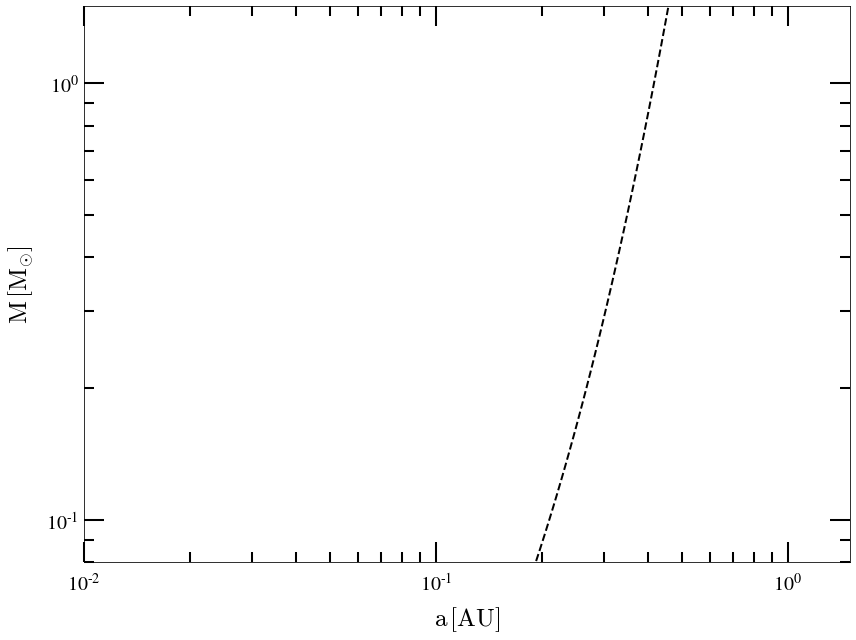

In [4]:
# Figure 11 from Barnes+17: https://arxiv.org/pdf/1708.02981.pdf

a_TD = np.logspace(np.log10(0.1), np.log10(1.5), 100)
M_TD = np.logspace(np.log10(0.01), np.log10(1.5), 100)


CTL_TD = 5.0E-1*(a_TD + 0.65)**((3.8-0.7)/(0.48-0.19))
CPL_TD = 1.0E0*(a_TD - 0.28)**((1.5-0.7)/(0.48-0.19))


fig, ax = plt.subplots(figsize=(12,9))


ax.plot(a_TD, CTL_TD, 'k--', lw=2.0);
#ax.plot(a_TD, CPL_TD, 'k-', lw=2.0);


ax.set_xlabel(r'$\rm{a \, [AU]}$',fontsize = 25, labelpad=10);
ax.tick_params(axis='x', which='major', pad=10)
ax.set_ylabel(r'$\rm{M \, [M_{\odot}]}$',fontsize = 25, labelpad=10)
ax.tick_params(axis='y', which='major', pad=5)

for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(20);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(20); 
            
            
ax.tick_params(which='both', width=2.05);
ax.tick_params(which='major', length=20);
ax.tick_params(which='minor', length=10);
ax.set_xlim(0.01, 1.5);
#ax.set_xticks([6400, 6500, 6600]);
ax.minorticks_on();
ax.set_xscale('log');
ax.set_yscale('log');
ax.set_ylim(0.08, 1.5);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')



# For the legend
#l = plt.legend(loc=1, bbox_to_anchor=(0.97, 0.32), frameon=True, shadow=True,\
#               title=r'$\rm{273 \, < \, T_{surf} \, [K] \, < \, 373}$', labelspacing=1.0)
#setp(l.get_texts(), fontsize=21) 
#setp(l.get_title(), fontsize=21)




fig.tight_layout()
#fig.savefig('Tidallocking.pdf', bbox_to_inches = 'tight')

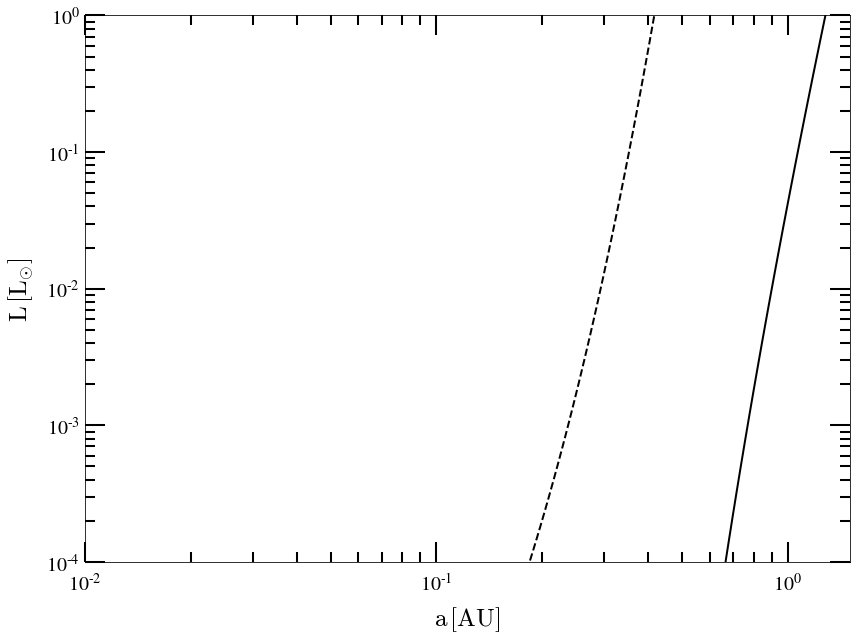

In [5]:
# Assume MS stars: L \propto M**3.5
idxMS = 3.5
L_TD = (M_TD)**idxMS




fig, ax = plt.subplots(figsize=(12,9))


ax.plot(a_TD, CTL_TD**idxMS, 'k--', lw=2.0);
ax.plot(a_TD, CPL_TD**idxMS, 'k-', lw=2.0);


ax.plot()


ax.set_xlabel(r'$\rm{a \, [AU]}$',fontsize = 25, labelpad=10);
ax.tick_params(axis='x', which='major', pad=10)
ax.set_ylabel(r'$\rm{L \, [L_{\odot}]}$',fontsize = 25, labelpad=10)
ax.tick_params(axis='y', which='major', pad=5)

for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(20);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(20); 
            
            
ax.tick_params(which='both', width=2.05);
ax.tick_params(which='major', length=20);
ax.tick_params(which='minor', length=10);
ax.set_xlim(0.01, 1.5);
#ax.set_xticks([6400, 6500, 6600]);
ax.minorticks_on();
ax.set_xscale('log');
ax.set_yscale('log');
ax.set_ylim(1.E-4, 1.E0);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')



# For the legend
#l = plt.legend(loc=1, bbox_to_anchor=(0.97, 0.32), frameon=True, shadow=True,\
#               title=r'$\rm{273 \, < \, T_{surf} \, [K] \, < \, 373}$', labelspacing=1.0)
#setp(l.get_texts(), fontsize=21) 
#setp(l.get_title(), fontsize=21)




fig.tight_layout()
#fig.savefig('Tidallocking.pdf', bbox_to_inches = 'tight')

## Habitable zones from radiative transfer calculations: rationale 

HZ: Liquid water on planet's surface (273 < T [K] < 373)



Caldwell (1992): equation for radiative balance:

(1 - A) * pi * R_{2}**2 * S = f * 4 * pi * R_{2}**2 * sigma * T_{eq,2}**2


A: albedo

R2: planet's radius

S = L / (4*pi*a**2) [power per surface unit]

T_{eq,2} = function(A, L1, a) [planet's effective temperature]

f: either 0.5 (planet tidally locked) or 1.0 (normal rotation)




Surface temperature: depends on optical depth

T_{surf,2}**4 = T_{eq,2}**4 * (1 + 2/3 * tau)

Usually, 0.1 <= tau <= 10,100  (tau = 1 would be realistic, close to Earth's)

Greenhouse effect on Solar System:

Planet     Tsurf     A     Teff     Ttop     tau
Venus       750     0.77    227     ~230     160
Earth       288     0.30    256     ~250     0.80
Mars        230     0.15    216     ~220     0.38


0.8 <= M_{planet} [M_{\oplus}] <= 10

In [6]:
# Some definitions

npoints = 1000

loglmin = np.log10(2.E-4)
loglmax = np.log10(0.2)

L = np.logspace(loglmin, loglmax, npoints)
f = np.array([0.25, 0.5, 0.75, 1.0])
A = np.array([0., 0.5])
a = np.logspace(-3, 1, npoints)
tau = np.array([0.01, 1.0])




def Lum(R = [], Teff = []):
    
    import numpy as np
    sigma = 5.670367E-8 #W*m−2*K−4
    
    return 4 * np.pi * R**2 * sigma * Teff**4



def Seff(L = [], a = []):
    
    import numpy as np
    
    return L * 1. / (4. * np.pi * a**2)



def Teff(A = [], Seff = [], f = []):
    
    import numpy as np
    sigma = 5.670367E-8 #W*m−2*K−4
    
    return np.power( ( (1 - A) * Seff / (4. * f * sigma)  ), 1./4.)



def Tsurf(Teff = [], tau = []):

    return Teff * np.power( (1 + 2./3. * tau), 1./4.)

In [7]:
#### Example: Solar System

aref = np.logspace(-3, 2, 1000)

tau_Venus = 160
tau_Earth = 0.80
tau_Mars = 0.38

albedo_Venus = 0.77
albedo_Earth = 0.30
albedo_Mars = 0.15


#--------------------------------------------------------------------------------------------------------------------------------


Seff_Venus = Seff(Lsun, 0.7*One_AU) 
Seff_Earth = Seff(Lsun, 1.0*One_AU)
Seff_Mars = Seff(Lsun, 1.5*One_AU)

Teff_Venus = Teff(albedo_Venus, Seff_Venus, 1.0)
Teff_Earth = Teff(albedo_Earth, Seff_Earth, 1.0)
Teff_Mars = Teff(albedo_Mars, Seff_Mars, 1.0)

Tsurf_Venus = Tsurf(Teff_Venus, 160)
Tsurf_Earth = Tsurf(Teff_Earth, 0.80)
Tsurf_Mars = Tsurf(Teff_Mars, 0.38)


#--------------------------------------------------------------------------------------------------------------------------------


Seff_SS = Seff(Lsun, aref*One_AU)

Teff_SS_Venuslike = Teff(albedo_Venus, Seff_SS, aref)
Tsurf_SS_Venuslike = Tsurf(Teff_SS_Venuslike,tau_Venus)

Teff_SS_Earthlike = Teff(albedo_Earth, Seff_SS, aref)
Tsurf_SS_Earthlike = Tsurf(Teff_SS_Earthlike,tau_Earth)

Teff_SS_Marslike = Teff(albedo_Mars, Seff_SS, aref)
Tsurf_SS_Marslike = Tsurf(Teff_SS_Marslike,tau_Mars)


amin_Venuslike = aref[ np.where( (Tsurf_SS_Venuslike >= 273) & (Tsurf_SS_Venuslike <= 373) ) [0] ] [0]
amax_Venuslike = aref[ np.where( (Tsurf_SS_Venuslike >= 273) & (Tsurf_SS_Venuslike <= 373) ) [0] ] [-1]

amin_Earthlike = aref[ np.where( (Tsurf_SS_Earthlike >= 273) & (Tsurf_SS_Earthlike <= 373) ) [0] ] [0]
amax_Earthlike = aref[ np.where( (Tsurf_SS_Earthlike >= 273) & (Tsurf_SS_Earthlike <= 373) ) [0] ] [-1]

amin_Marslike = aref[ np.where( (Tsurf_SS_Marslike >= 273) & (Tsurf_SS_Marslike <= 373) ) [0] ] [0]
amax_Marslike = aref[ np.where( (Tsurf_SS_Marslike >= 273) & (Tsurf_SS_Marslike <= 373) ) [0] ] [-1]


#--------------------------------------------------------------------------------------------------------------------------------


print "%.0f"%Tsurf_Venus, "%.0f"%Teff_Venus
print "%.0f"%Tsurf_Earth, "%.0f"%Teff_Earth
print "%.0f"%Tsurf_Mars, "%.0f"%Teff_Mars
print ''
print ''
print "%.2f"%amin_Venuslike, "%.2f"%amax_Venuslike
print "%.2f"%amin_Earthlike, "%.2f"%amax_Earthlike
print "%.2f"%amin_Marslike, "%.2f"%amax_Marslike

742 230
283 255
231 218


1.99 2.97
0.70 1.04
0.70 1.04


In [8]:
Seff_Mdwarf = np.zeros(( len(L), len(a) ))

Teff_Mdwarf = np.zeros(( np.concatenate((np.shape(Seff_Mdwarf), np.shape(A), np.shape(f)), axis=0) ))

Tsurf_Mdwarf = np.zeros(( np.concatenate((np.shape(Teff_Mdwarf), np.shape(tau)), axis=0) ))


for i, lum in enumerate(L):
    
    for j, dist in enumerate(a):
        
        Seff_Mdwarf[i][j] = Seff(lum*Lsun, dist*One_AU)
            
        for k, alb in enumerate(A):
            
            for l, fact in enumerate(f):
                
                Teff_Mdwarf[i][j][k][l] = Teff(alb, Seff_Mdwarf[i][j], fact)
                
                for m, ta in enumerate(tau):
                
                    Tsurf_Mdwarf[i][j][k][l][m] = Tsurf(Teff_Mdwarf[i][j][k][l], ta)           

In [9]:
wh_tau_min = np.where(tau == np.min(tau)) [0][0]
wh_tau_max = np.where(tau == np.max(tau)) [0][0]

wh_albedo_min = np.where(A == np.min(A)) [0][0]
wh_albedo_max = np.where(A == np.max(A)) [0][0]

wh_factor_half = np.where(f == 0.5) [0][0]
wh_factor_all = np.where(f == 1.0) [0][0]


# IHZ and OHZ will be determined by:
# Tsurf,min(A=0.5,f=1.0,tau=0.01) 
# Tsurf,max(A=0.0,f=0.5,tau=100)

In [10]:
Tsurf_Mdwarf_IHZ = np.zeros(( len(L), len(a) ))
Tsurf_Mdwarf_OHZ = np.zeros(( len(L), len(a) ))


##### HZ parameters. In the end, for each luminosity, find low and high limits for the semimajor axis #####


# Inner limit HZ
HZ_Mdwarf_IHZ = np.zeros(len(L), dtype=int)
HZ_Seff_Mdwarf_IHZ = np.zeros(len(L), dtype=int)
HZ_a_Mdwarf_IHZ = np.zeros(len(L))
HZ_Lumstar_Mdwarf_IHZ = np.zeros(len(L))

# Outer limit HZ
HZ_Mdwarf_OHZ = np.zeros(len(L), dtype=int)
HZ_Seff_Mdwarf_OHZ = np.zeros(len(L), dtype=int)
HZ_a_Mdwarf_OHZ = np.zeros(len(L))
HZ_Lumstar_Mdwarf_OHZ = np.zeros(len(L))




for i, lum in enumerate(L):
    
    for j, dist in enumerate(a):
        
        # All the planets are tidally locked, according to the models by Barnes+17...
        # Change these two as desired
        Tsurf_Mdwarf_IHZ[i][j] = Tsurf_Mdwarf[i][j][wh_albedo_max][wh_factor_half][wh_tau_min]
        Tsurf_Mdwarf_OHZ[i][j] = Tsurf_Mdwarf[i][j][wh_albedo_min][wh_factor_half][wh_tau_max]
        
        
        
    HZ_Mdwarf_IHZ[i] = np.where( (Tsurf_Mdwarf_IHZ[i] >= 273) & (Tsurf_Mdwarf_IHZ[i] <= 373) ) [0][0]
    HZ_Mdwarf_OHZ[i] = np.where( (Tsurf_Mdwarf_OHZ[i] >= 273) & (Tsurf_Mdwarf_OHZ[i] <= 373) ) [0][-1]
    
    HZ_Seff_Mdwarf_IHZ[i] =  Seff_Mdwarf[i][HZ_Mdwarf_IHZ[i]]
    HZ_Seff_Mdwarf_OHZ[i] =  Seff_Mdwarf[i][HZ_Mdwarf_OHZ[i]]
    
    HZ_a_Mdwarf_IHZ[i] =  a[HZ_Mdwarf_IHZ[i]]
    HZ_a_Mdwarf_OHZ[i] =  a[HZ_Mdwarf_OHZ[i]]
    
    HZ_Lumstar_Mdwarf_IHZ[i] = HZ_Seff_Mdwarf_IHZ[i] * 4 * np.pi * (HZ_a_Mdwarf_IHZ[i]*One_AU)**2 / Lsun
    HZ_Lumstar_Mdwarf_OHZ[i] = HZ_Seff_Mdwarf_OHZ[i] * 4 * np.pi * (HZ_a_Mdwarf_OHZ[i]*One_AU)**2 / Lsun
    
    

    
    
### Final interpolations ###
knd = 'linear'
#knd = 'quadratic'
#knd = 'cubic'

HZ_interp_aLum_Mdwarf_IHZ = interpolate.interp1d(HZ_a_Mdwarf_IHZ, HZ_Lumstar_Mdwarf_IHZ, kind = knd)
HZ_interp_aLum_Mdwarf_OHZ = interpolate.interp1d(HZ_a_Mdwarf_OHZ, HZ_Lumstar_Mdwarf_OHZ, kind = knd)

In [11]:
### ROCHE LIMIT: 
### http://adsabs.harvard.edu/abs/1974ApJ...191..577A

# d = r * ( 2 * M/m )**1/3 = R * ( 2 * rhoM/rhom )**1/3

def Roche_solid(r, M, m): # au
    
    return r * ( 2 * M/m )**(1./3.) * 1./One_AU



REarth = 6.3781366E6 # m
MEarth = 5.98E24 # kg

print Roche_solid(REarth, Msun, MEarth) 

0.00371620564065


In [12]:
# SS planets

a_SS = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.55, 19.22, 30.11])
m_SS = np.array([0.0553, 0.815, 1.00, 0.11, 317.8, 95.2, 14.6, 17.2])
r_SS = np.array([0.38, 0.95, 1.00, 0.53, 10.97, 9.14, 3.98, 3.87])
color_SS = np.array(['black', 'darkkhaki', 'deepskyblue', 'crimson', 
                     'darkgoldenrod', 'chocolate', 'turquoise', 'cadetblue'])

## Mass-radius forecasting for the exoplanets. Already included in final table

## Interpolate to find k2, Q and lambda (gyration radius) using values for small, rocky planets, Neptune and Jupiter

In [13]:
r_kQ = np.array([1.5, 3.88, 10.97]) # Limit for Rocky (Barnes), Neptune, Jupiter
k_arr = np.array([0.3, 1.5, 1.5 + 1.E-4])
Q_arr = np.array([2, 4, 6]) # log
lambda_arr = np.array([0.37, 0.23, 0.254]) 


fit_k = np.polyfit(r_kQ[:-1], k_arr[:-1], 1)

fit_Q_1 = np.polyfit(np.log10(r_kQ[:-1]), Q_arr[:-1], 1)
fit_Q_2 = np.polyfit(np.log10(r_kQ[-2:]), Q_arr[-2:], 1)

fit_lambda_1 = np.polyfit(r_kQ[:-1], lambda_arr[:-1], 1)
fit_lambda_2 = np.polyfit(r_kQ[-2:], lambda_arr[-2:], 1)


print fit_k[0], fit_k[1]
print ''
print fit_Q_1[0], 10**fit_Q_1[1]
print fit_Q_2[0], 10**fit_Q_2[1]
print ''
print fit_lambda_1[0], fit_lambda_1[1]
print fit_lambda_2[0], fit_lambda_2[1]

0.5042016806722688 -0.4563025210084033

4.845660074896766 14.019147865877494
4.43090652852999 24.60037134436068

-0.0588235294117647 0.4582352941176471
0.0033850493653032362 0.21686600846262336


In [14]:
# Interpolate to generate k2/Q/lambda-R relations for the exoplanets

def k2_r(r = []):
    
    r = np.asarray([r])
    
    k2r = np.asarray([1.0E-20]*len(r)) 
    
    for ri, rr in enumerate(r):
        
    
        if rr <= 1.5:
        
            k2r[ri] = 0.3
            
            
        elif ((rr > 1.5) & (rr <= 3.87)):
        
            k2r[ri] = fit_k[1] + rr * fit_k[0]
            
    
        else:
        
            k2r[ri] = 1.5
            
            
    return k2r




def Q_r(r = []):
    
    r = np.asarray([r])
    
    Qr = np.asarray([1.0E-20]*len(r)) 
    
    for ri, rr in enumerate(r):
        
    
        if rr <= 1.5:
        
            Qr[ri] = 1.E2
            
            
        elif ((rr > 1.5) & (rr <= 3.88)):
        
            Qr[ri] = 10**fit_Q_1[1] * rr**fit_Q_1[0]
            
            
        elif ((rr > 3.88) & (rr <= 10.97)):
        
            Qr[ri] = 10**fit_Q_2[1] * rr**fit_Q_2[0]
            
    
        else:
        
            Qr[ri] = 1.E6
            
            
    return Qr




def lambda_r(r = []):
    
    r = np.asarray([r])
    
    lambdar = np.asarray([1.0E-20]*len(r)) 
    
    for ri, rr in enumerate(r):
        
    
        if rr <= 1.5:
        
            lambdar[ri] = 0.37
            
            
        elif ((rr > 1.5) & (rr <= 3.88)):
        
            lambdar[ri] = fit_lambda_1[1] + rr * fit_lambda_1[0]
            
            
        elif ((rr > 3.88) & (rr <= 10.97)):
        
            lambdar[ri] = fit_lambda_2[1] + rr * fit_lambda_2[0]
            
    
        else:
        
            lambdar[ri] = 0.254
            
            
    return lambdar

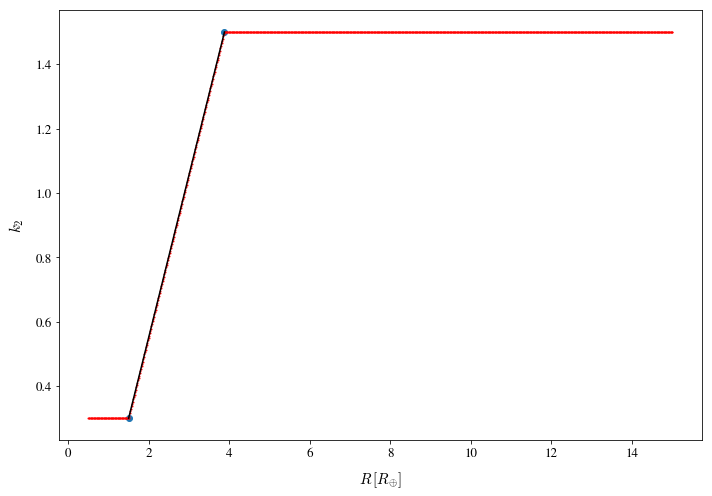

In [15]:
plt.figure(figsize=(10,7))

plt.xlabel(r'$R \, [R_{\oplus}]$', fontsize=15, labelpad=10);
plt.ylabel(r'$k_{2}$', fontsize=15, labelpad=10);

plt.xticks(size=13)
plt.yticks(size=13)
    
    
plt.scatter(r_kQ[:-1], k_arr[:-1]); 
plt.plot(r_kQ[:-1], fit_k[1] + r_kQ[:-1]*fit_k[0], color='black');


r_k2Qplot = np.linspace(0.5, 15., 1000)
for i in r_k2Qplot:
    plt.scatter(i, k2_r(i), color='red', s=1);
    
    
plt.tight_layout()
plt.savefig('k2r.jpg', bbox_to_inches = 'tight')

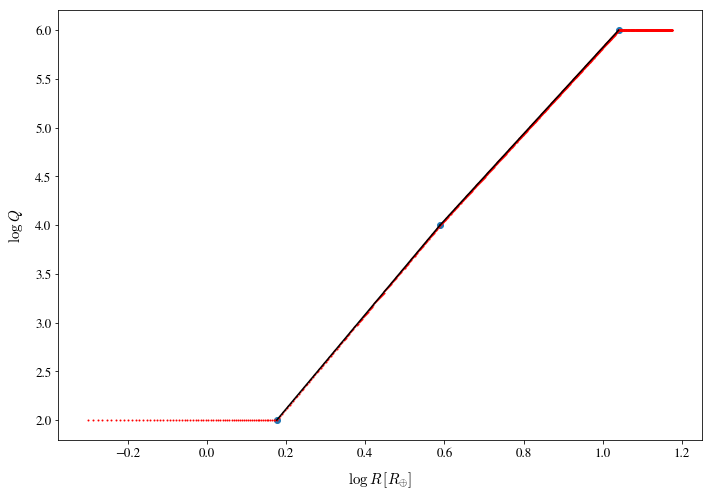

In [16]:
plt.figure(figsize=(10,7))

plt.xlabel(r'$\log \, R \, [R_{\oplus}]$', fontsize=15, labelpad=10);
plt.ylabel(r'$\log \, Q$', fontsize=15, labelpad=10);

plt.xticks(size=13)
plt.yticks(size=13)
    
    
plt.scatter(np.log10(r_kQ), Q_arr); 
plt.plot(np.log10(r_kQ[:-1]), fit_Q_1[1] + np.log10(r_kQ[:-1])*fit_Q_1[0], color='black');
plt.plot(np.log10(r_kQ[-2:]), fit_Q_2[1] + np.log10(r_kQ[-2:])*fit_Q_2[0], color='black');

for i in r_k2Qplot:
    plt.scatter(np.log10(i), np.log10(Q_r(i)), color='red', s=1);
    
    
plt.tight_layout()
plt.savefig('Qr.jpg', bbox_to_inches = 'tight')

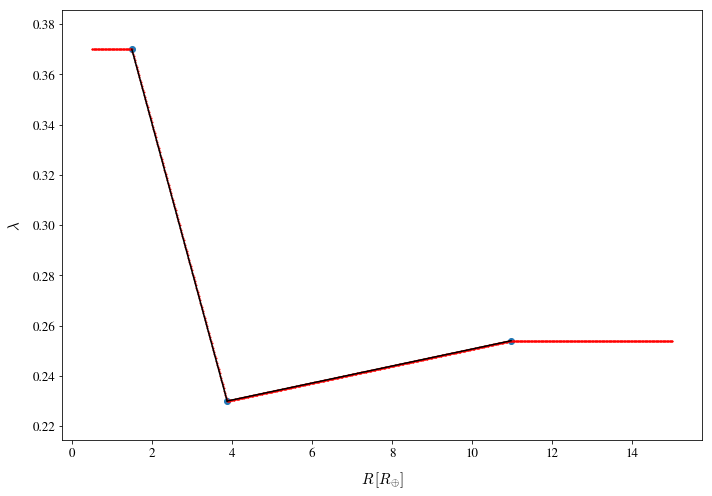

In [17]:
plt.figure(figsize=(10,7))

plt.xlabel(r'$R \, [R_{\oplus}]$', fontsize=15, labelpad=10);
plt.ylabel(r'$\lambda$', fontsize=15, labelpad=10);

plt.xticks(size=13)
plt.yticks(size=13)
    
    
plt.scatter(r_kQ, lambda_arr); 
plt.plot(r_kQ[:-1], fit_lambda_1[1] + r_kQ[:-1]*fit_lambda_1[0], color='black');
plt.plot(r_kQ[-2:], fit_lambda_2[1] + r_kQ[-2:]*fit_lambda_2[0], color='black');


for i in r_k2Qplot:
    plt.scatter(i, lambda_r(i), color='red', s=1);
    
    
plt.tight_layout()
plt.savefig('lambdar.jpg', bbox_to_inches = 'tight')

## Load tables with stellar and planetary data

In [18]:
star_prop = Table.read(path_data + 'hmr18.stars.v16.csv', format='ascii.csv')
planet_prop = Table.read(path_data + 'hmr18.planets.v19.csv', format='ascii.csv')

print star_prop.colnames
print ''
print planet_prop.colnames

['ID', 'Name', 'Alt. name', 'Karmn', 'RA_J2015.5', 'DE_J2015.5', 'd_pc', 'ed_pc', 'Ref_d', 'SpT', 'SpTnum', 'FUV_mag', 'eFUV_mag', 'NUV_mag', 'eNUV_mag', 'Ref19', 'u_mag', 'eu_mag', 'Ref20', 'BT_mag', 'eBT_mag', 'Ref21', 'B_mag', 'eB_mag', 'Ref22', 'g_mag', 'eg_mag', 'Ref23', 'BPmag', 'e_BPmag', 'Ref_24', 'VT_mag', 'eVT_mag', 'Ref25', 'V_mag', 'eV_mag', 'Ref26', 'Gmag', 'e_Gmag', 'Ref_27', 'r_mag', 'er_mag', 'Ref28', 'i_mag', 'ei_mag', 'Ref29', 'RPmag', 'e_RPmag', 'Ref_30', 'J_mag', 'eJ_mag', 'H_mag', 'eH_mag', 'Ks_mag', 'eKs_mag', 'Qflag_2M', 'Ref31', 'W1_mag', 'eW1_mag', 'W2_mag', 'eW2_mag', 'W3_mag', 'eW3_mag', 'W4_mag', 'eW4_mag', 'Qflag_W', 'Ref32', 'K', 'M_Ben16', 'M_Del00', 'M_adopted', 'Source', 'M_mann', 'eM_mann', 'Model', 'Teff', 'logg', 'Meta.', 'Lbol', 'Lberr']

['ID', 'Name', 'Planet', 'a_au', '+a_au', '-a_au', 'P_day', '+P_day', '-P_day', 'Mod', 'M_earth', '+M_earth', '-M_earth', 'M_earth_est', 'R_earth', '+R_earth', '-R_earth', 'R_earth_est', 'Detection', 'True M&R', 'M

In [19]:
planet_name = planet_prop['Name']
planet_char = planet_prop['Planet']
planet_a = planet_prop['a_au']
planet_M = planet_prop['M_earth_est']
planet_R =planet_prop['R_earth_est']

star_name = star_prop['Name']
# Detection methods: RV (Radial Velocity), PT (Primary Transit), X (RV+PT)
planet_detect = planet_prop['Detection']
star_L = planet_prop['Lbol']
star_M = np.zeros(len(star_L))
star_Teff = np.zeros(len(star_L))



for s, ss in enumerate(planet_name):
    
    for n, nn in enumerate(star_prop['Name']):
        
        if ss == nn:
            
            star_M[s] = star_prop['M_mann'][n]
            star_Teff[s] = star_prop['Teff'][n]

## Habitable zones from radiative transfer (not used in the paper)

In [20]:
### HABITABLE, BOIL AND FREEZE POLYGONS

# Start from low, left vertex of the HZ and move counterclockwise

bla = np.where(np.isfinite(HZ_interp_aLum_Mdwarf_IHZ(HZ_a_Mdwarf_IHZ))==True)

v0x = np.log10(np.min(HZ_a_Mdwarf_IHZ[bla]))
v0y = np.log10(np.min(HZ_interp_aLum_Mdwarf_IHZ(HZ_a_Mdwarf_IHZ[bla])))

v3x = np.log10(np.max(HZ_a_Mdwarf_IHZ[bla]))
v3y = np.log10(np.max(HZ_interp_aLum_Mdwarf_IHZ(HZ_a_Mdwarf_IHZ[bla])))


bla = np.where(np.isfinite(HZ_interp_aLum_Mdwarf_OHZ(HZ_a_Mdwarf_OHZ))==True)

v1x = np.log10(np.min(HZ_a_Mdwarf_OHZ[bla]))
v1y = np.log10(np.min(HZ_interp_aLum_Mdwarf_OHZ(HZ_a_Mdwarf_OHZ[bla])))

v2x = np.log10(np.max(HZ_a_Mdwarf_OHZ[bla]))
v2y = np.log10(np.max(HZ_interp_aLum_Mdwarf_OHZ(HZ_a_Mdwarf_OHZ[bla])))




polygon_habitable = Polygon([(v0x, v0y), (v1x, v1y), (v2x, v2y), (v3x, v3y)])

polygon_boil = Polygon([(-4, v0y), (v0x, v0y), (v3x, v3y), (-4, v3y)])

polygon_freeze = Polygon([(v1x, v1y), (2, v1y), (2, v2y), (v2x, v2y)])

In [21]:
wh_habitable = []
wh_boil = []
wh_freeze = []

color_pl = []


for i in range(len(planet_a)):
    
    if polygon_habitable.contains(Point(np.log10(planet_a[i]), np.log10(star_L[i]))):
        
        color_pl.append('forestgreen')
        wh_habitable.append(i)
        
    elif polygon_boil.contains(Point(np.log10(planet_a[i]), np.log10(star_L[i]))):
        
        color_pl.append('red')
        wh_boil.append(i)
        
    elif polygon_freeze.contains(Point(np.log10(planet_a[i]), np.log10(star_L[i]))):
        
        color_pl.append('blue')
        wh_freeze.append(i)
        
        
        
# Avoid plotting problems
color_pl = np.asarray(color_pl)

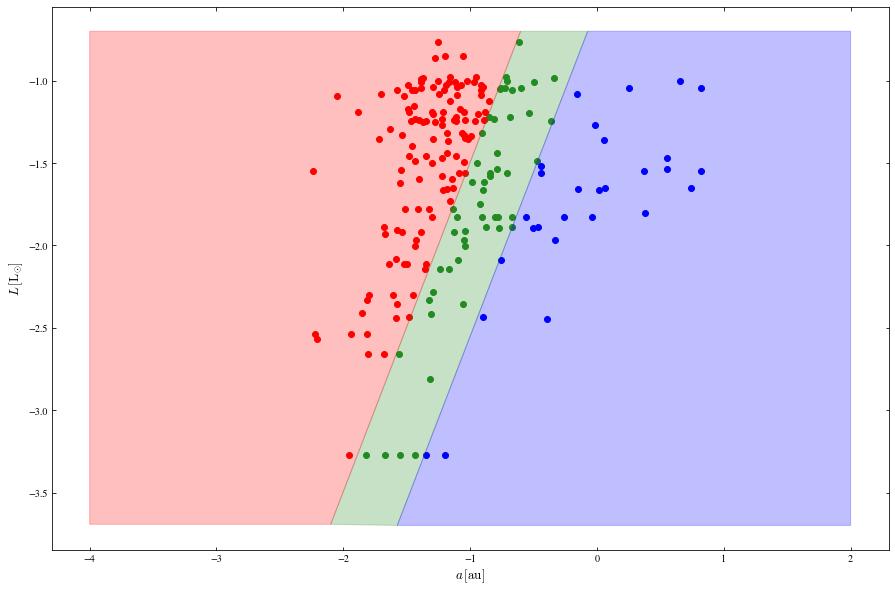

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))

habitable_patch = PolygonPatch(polygon_habitable, color='forestgreen', alpha=0.25)
ax.add_patch(habitable_patch)

boil_patch = PolygonPatch(polygon_boil, color='red', alpha=0.25)
ax.add_patch(boil_patch)

freeze_patch = PolygonPatch(polygon_freeze, color='blue', alpha=0.25)
ax.add_patch(freeze_patch)

ax.scatter(np.log10(planet_a[wh_habitable]), np.log10(star_L[wh_habitable]), color='forestgreen')
ax.scatter(np.log10(planet_a[wh_boil]), np.log10(star_L[wh_boil]), color='red')
ax.scatter(np.log10(planet_a[wh_freeze]), np.log10(star_L[wh_freeze]), color='blue')

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlabel(r'$a \, \rm{[au]}$',fontsize = 13);
ax.set_ylabel(r'$L \, \rm{[L_{\odot}]}$',fontsize = 13);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')

In [23]:
print len(wh_habitable)
print len(wh_boil)
print len(wh_freeze)

53
124
28


In [24]:
for h, hh in enumerate(planet_name[wh_habitable]):
    print hh + '\t' +  planet_char[wh_habitable][h]

LHS 1140	b
YZ Cet	d
GJ 96	b
CD-23 1056	b
LP 413-32 B	b
LPM 178	c
HG 8-15	d
LP 834-042	b
LP 834-042	d
LEHPM 3808	d
LP 776-27	b
LP 776-27	c
Kapteyn's star	b
BD-06 1339	c
Luyten's star	b
NGC 2632 JS 597	c
LTT 3758	c
K2-239	c
K2-239	d
Innes' star	b
PM J11293-0127	c
PM J11293-0127	d
PM J11302+0735	b
Ross 1003	b
LP 613-39	b
FI Vir	b
K2-152	b
Proxima Centauri	b
HO Lib	c
K2-286	b
HD 147379	b
MCC 767	b
V2306 Oph	c
HD 156384 C	c
HD 156384 C	e
HD 156384 C	f
CD-51 10924	e
CD-44 11909	b
Kepler-235	e
Kepler-52	d
Kepler-155	c
V1428 Aql	b
LSPM J1930+4149	b
Kepler-54	d
Kepler-186	f
Kepler-267	d
HD 204961	c
IL Aqr	b
IL Aqr	c
2MUCD 12171	c
2MUCD 12171	d
2MUCD 12171	e
2MUCD 12171	f


In [25]:
for h, hh in enumerate(planet_name[wh_boil]):
    print hh + '\t' +  planet_char[wh_boil][h]

GX And	b
K2-149	b
CD-44 170	b
LHS 1140	c
2MASS J01021226-6145216	b
BD+61 195	b
YZ Cet	b
YZ Cet	c
K2-150	b
K2-151	b
BD-17 400	b
BD-17 400	c
BD-21 784	b
LPM 178	b
Melotte 25 VA 50	b
HG 8-15	b
HG 8-15	c
LP 834-042	e
LEHPM 3808	b
LEHPM 3808	c
LP 358-499	b
LP 358-499	c
LP 358-499	d
HD 285968	b
LP 656-38	b
LP 892-26	b
NGTS-1	b
HATS-6	b
BD-06 1339	b
PM J06168+2435	b
Luyten's star	c
LP 424-4	b
NGC 2632 JS 183	b
K2-146	b
NGC 2632 JS 597	b
K2-117	b
K2-117	c
BD+48 1829	b
LTT 3758	b
K2-239	b
LP 905-36	b
Lalande 21185	b
K2-22	b
PM J11293-0127	b
PM J11302+0735	c
CD-31 9113	b
Ross 905	b
K2-153	b
K2-137	b
K2-154	b
K2-154	c
Ross 1020	b
HD 122303	b
K2-240	b
K2-240	c
HO Lib	b
HO Lib	d
MCC 759	b
USco J161014.7-191909	b
V2306 Oph	b
LHS 3275	b
BD+11 3149	b
BD+11 3149	c
HD 156384 C	b
CD-46 11540	b
CD-51 10924	d
BD+18 3421	b
Kepler-83	b
Kepler-83	c
Kepler-83	d
Kepler-446	b
Kepler-446	c
Kepler-446	d
Kepler-303	b
Kepler-303	c
Kepler-617	b
Kepler-236	b
Kepler-236	c
Kepler-235	b
Kepler-235	c
Kepler-235	d
Kepler-5

In [26]:
for h, hh in enumerate(planet_name[wh_freeze]):
    print hh + '\t' +  planet_char[wh_freeze][h]

BD-17 400	d
LPM 178	d
LP 834-042	c
Wolf 1539	b
LP 656-38	c
Kapteyn's star	c
HD 42581	b
LP 844-8	b
LP 844-8	c
BD+02 2098	b
CD-31 9113	c
Ross 1003	c
LP 804-27	b
V2306 Oph	d
BD+25 3173	b
HD 156384 C	d
HD 156384 C	g
CD-51 10924	b
CD-51 10924	c
BD+68 946	b
CD-44 11909	c
Barnard's star	b
HD 204961	b
BD-05 5715	b
BD-05 5715	c
IL Aqr	e
2MUCD 12171	g
2MUCD 12171	h


In [27]:
# Filled circles for transit and empty circles for radial velocity


#Radial Velocity
#Primary Transit
wh_RV = np.where(planet_detect == 'RV')[0]
wh_PT = np.where( (planet_detect == 'PT') | (planet_detect == 'X')  | (planet_detect == 'PT+RV') )[0]



wh_habitable_RV = sorted(list(set(wh_habitable).intersection(wh_RV)))
wh_habitable_PT = sorted(list(set(wh_habitable).intersection(wh_PT)))

wh_boil_RV = sorted(list(set(wh_boil).intersection(wh_RV)))
wh_boil_PT = sorted(list(set(wh_boil).intersection(wh_PT)))

wh_freeze_RV = sorted(list(set(wh_freeze).intersection(wh_RV)))
wh_freeze_PT = sorted(list(set(wh_freeze).intersection(wh_PT)))

## Habitable zones from [Kopparapu+14](https://ui.adsabs.harvard.edu/abs/2014ApJ...787L..29K/abstract)

In [28]:
path_data_Kop = os.getcwd() + '/data_Kop/'

# Table 1 from http://adsabs.harvard.edu/abs/2014ApJ...787L..29K (Kopparapu +14)
# See also http://adsabs.harvard.edu/abs/2013ApJ...765..131K (Kopparapu +13)
# The coefficients are as follows. The columns, i, are arranged according to
# the HZ limits given in the paper.
#
# i = 1 --> Recent Venus
# i = 2 --> Runaway Greenhouse
# i = 3 --> Maximum Greenhouse
# i = 4 --> Early Mars
# i = 5 --> Runaway Greenhouse for 5 ME
# i = 6 --> Runaway Greenhouse for 0.1 ME
# First row: S_effSun(i)
# Second row: a(i)
# Third row:  b(i)
# Fourth row: c(i)
# Fifth row:  d(i)
HZ_coeff = np.genfromtxt(path_data_Kop + 'HZ_coefficients.dat')
S_effSun = HZ_coeff[0]
a_coeff = HZ_coeff[1]
b_coeff = HZ_coeff[2]  
c_coeff = HZ_coeff[3]  
d_coeff = HZ_coeff[4]  

# Habitable zone 'fluxes' S_eff [Sun]
Seff_HZs = np.genfromtxt(path_data_Kop + 'HZs.dat')
Teff = Seff_HZs[:,0]



Seff_HZs_interp = []

for i in range(6):
    
    Seff_HZs_interp.append(interpolate.interp1d(Teff, Seff_HZs[:,i + 1], kind='linear'))
    
    
L_Lsun_interp = interpolate.interp1d(np.sort(star_prop['Teff']), np.sort(star_prop['Lbol']), kind='linear')

In [29]:
### HABITABLE, BOIL AND FREEZE POLYGONS
### IHZ: Recent Venus
### OHZ: Maximum Greenhouse

# Start from low, left vertex of the HZ and move counterclockwise

HZ_a_Mdwarf_IHZ = np.sqrt(L_Lsun_interp(np.asarray(np.sort(star_prop['Teff'])))
                          /Seff_HZs_interp[0](np.asarray(np.sort(star_prop['Teff']))))

v0x = np.log10(np.min(HZ_a_Mdwarf_IHZ))
v0y = np.log10(np.min(L_Lsun_interp(np.asarray(np.sort(star_prop['Teff'])))))

v3x = np.log10(np.max(HZ_a_Mdwarf_IHZ))
# Problems with Kepler-155, maxL
v3y = np.log10(np.max(L_Lsun_interp(np.asarray(np.sort(star_prop['Teff']))))) + 0.001




HZ_a_Mdwarf_OHZ = np.sqrt(L_Lsun_interp(np.asarray(np.sort(star_prop['Teff'])))
                          /Seff_HZs_interp[2](np.asarray(np.sort(star_prop['Teff']))))

v1x = np.log10(np.min(HZ_a_Mdwarf_OHZ))
v1y = np.log10(np.min(L_Lsun_interp(np.asarray(np.sort(star_prop['Teff'])))))

v2x = np.log10(np.max(HZ_a_Mdwarf_OHZ))
# Problems with Kepler-155, maxL
v2y = np.log10(np.max(L_Lsun_interp(np.asarray(np.sort(star_prop['Teff']))))) + 0.001




polygon_habitable = Polygon([(v0x, v0y), (v1x, v1y), (v2x, v2y), (v3x, v3y)])

polygon_boil = Polygon([(-4, v0y), (v0x, v0y), (v3x, v3y), (-4, v3y)])

polygon_freeze = Polygon([(v1x, v1y), (2, v1y), (2, v2y), (v2x, v2y)])

In [30]:
wh_habitable = []
wh_boil = []
wh_freeze = []

color_pl = []


for i in range(len(planet_a)):
    
    if polygon_habitable.contains(Point(np.log10(planet_a[i]), np.log10(star_L[i]))):
        
        color_pl.append('forestgreen')
        wh_habitable.append(i)
        
    elif polygon_boil.contains(Point(np.log10(planet_a[i]), np.log10(star_L[i]))):
        
        color_pl.append('red')
        wh_boil.append(i)
        
    elif polygon_freeze.contains(Point(np.log10(planet_a[i]), np.log10(star_L[i]))):
        
        color_pl.append('blue')
        wh_freeze.append(i)
        
        
        
# Avoid plotting problems
color_pl = np.asarray(color_pl)

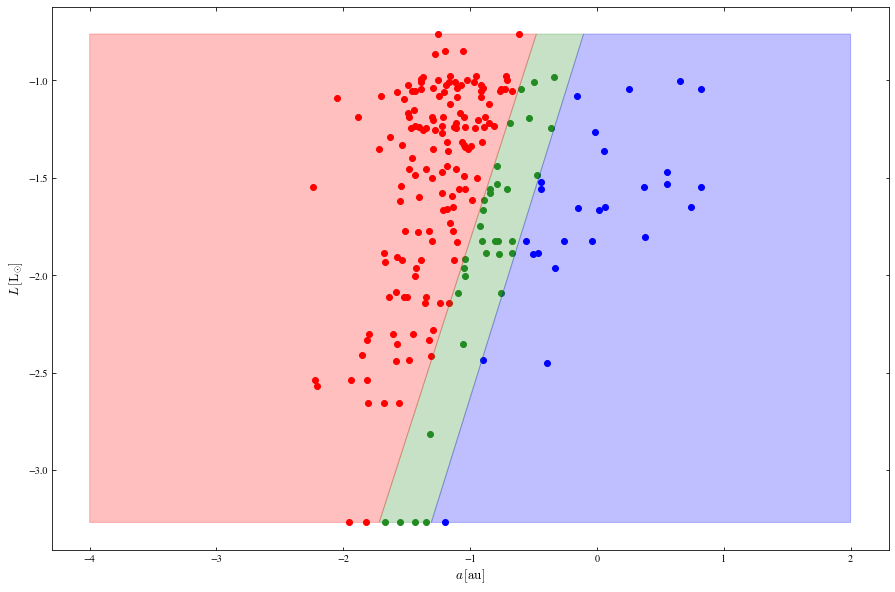

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))

habitable_patch = PolygonPatch(polygon_habitable, color='forestgreen', alpha=0.25)
ax.add_patch(habitable_patch)

boil_patch = PolygonPatch(polygon_boil, color='red', alpha=0.25)
ax.add_patch(boil_patch)

freeze_patch = PolygonPatch(polygon_freeze, color='blue', alpha=0.25)
ax.add_patch(freeze_patch)

ax.scatter(np.log10(planet_a[wh_habitable]), np.log10(star_L[wh_habitable]), color='forestgreen')
ax.scatter(np.log10(planet_a[wh_boil]), np.log10(star_L[wh_boil]), color='red')
ax.scatter(np.log10(planet_a[wh_freeze]), np.log10(star_L[wh_freeze]), color='blue')

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlabel(r'$a \, \rm{[au]}$',fontsize = 13);
ax.set_ylabel(r'$L \, \rm{[L_{\odot}]}$',fontsize = 13);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')

In [32]:
print len(wh_habitable)
print len(wh_boil)
print len(wh_freeze)

33
146
26


In [33]:
for h, hh in enumerate(planet_name[wh_habitable]):
    print hh + '\t' +  planet_char[wh_habitable][h]

LHS 1140	b
GJ 96	b
CD-23 1056	b
LP 413-32 B	b
LPM 178	c
LP 834-042	b
LP 834-042	d
LP 776-27	c
Kapteyn's star	b
BD-06 1339	c
Luyten's star	b
Innes' star	b
PM J11293-0127	d
PM J11302+0735	b
Ross 1003	b
LP 613-39	b
Proxima Centauri	b
HD 147379	b
V2306 Oph	c
HD 156384 C	c
HD 156384 C	e
HD 156384 C	f
CD-44 11909	b
CD-44 11909	c
V1428 Aql	b
Kepler-186	f
HD 204961	c
IL Aqr	b
IL Aqr	c
2MUCD 12171	d
2MUCD 12171	e
2MUCD 12171	f
2MUCD 12171	g


In [34]:
for h, hh in enumerate(planet_name[wh_boil]):
    print hh + '\t' +  planet_char[wh_boil][h]

GX And	b
K2-149	b
CD-44 170	b
LHS 1140	c
2MASS J01021226-6145216	b
BD+61 195	b
YZ Cet	b
YZ Cet	c
YZ Cet	d
K2-150	b
K2-151	b
BD-17 400	b
BD-17 400	c
BD-21 784	b
LPM 178	b
Melotte 25 VA 50	b
HG 8-15	b
HG 8-15	c
HG 8-15	d
LP 834-042	e
LEHPM 3808	b
LEHPM 3808	c
LEHPM 3808	d
LP 358-499	b
LP 358-499	c
LP 358-499	d
HD 285968	b
LP 776-27	b
LP 656-38	b
LP 892-26	b
NGTS-1	b
HATS-6	b
BD-06 1339	b
PM J06168+2435	b
Luyten's star	c
LP 424-4	b
NGC 2632 JS 183	b
K2-146	b
NGC 2632 JS 597	b
NGC 2632 JS 597	c
K2-117	b
K2-117	c
BD+48 1829	b
LTT 3758	b
LTT 3758	c
K2-239	b
K2-239	c
K2-239	d
LP 905-36	b
Lalande 21185	b
K2-22	b
PM J11293-0127	b
PM J11293-0127	c
PM J11302+0735	c
CD-31 9113	b
Ross 905	b
FI Vir	b
K2-152	b
K2-153	b
K2-137	b
K2-154	b
K2-154	c
Ross 1020	b
HD 122303	b
K2-240	b
K2-240	c
HO Lib	b
HO Lib	c
HO Lib	d
K2-286	b
MCC 759	b
USco J161014.7-191909	b
MCC 767	b
V2306 Oph	b
LHS 3275	b
BD+11 3149	b
BD+11 3149	c
HD 156384 C	b
CD-46 11540	b
CD-51 10924	d
CD-51 10924	e
BD+18 3421	b
Kepler-83	b
Kepler-

In [35]:
for h, hh in enumerate(planet_name[wh_freeze]):
    print hh + '\t' +  planet_char[wh_freeze][h]

BD-17 400	d
LPM 178	d
LP 834-042	c
Wolf 1539	b
LP 656-38	c
Kapteyn's star	c
HD 42581	b
LP 844-8	b
LP 844-8	c
BD+02 2098	b
CD-31 9113	c
Ross 1003	c
LP 804-27	b
V2306 Oph	d
BD+25 3173	b
HD 156384 C	d
HD 156384 C	g
CD-51 10924	b
CD-51 10924	c
BD+68 946	b
Barnard's star	b
HD 204961	b
BD-05 5715	b
BD-05 5715	c
IL Aqr	e
2MUCD 12171	h


In [36]:
# Filled circles for transit and empty circles for radial velocity


#Radial Velocity
#Primary Transit
wh_RV = np.where(planet_detect == 'RV')[0]
wh_PT = np.where( (planet_detect == 'PT') | (planet_detect == 'X')  | (planet_detect == 'PT+RV') )[0]



wh_habitable_RV = sorted(list(set(wh_habitable).intersection(wh_RV)))
wh_habitable_PT = sorted(list(set(wh_habitable).intersection(wh_PT)))

wh_boil_RV = sorted(list(set(wh_boil).intersection(wh_RV)))
wh_boil_PT = sorted(list(set(wh_boil).intersection(wh_PT)))

wh_freeze_RV = sorted(list(set(wh_freeze).intersection(wh_RV)))
wh_freeze_PT = sorted(list(set(wh_freeze).intersection(wh_PT)))

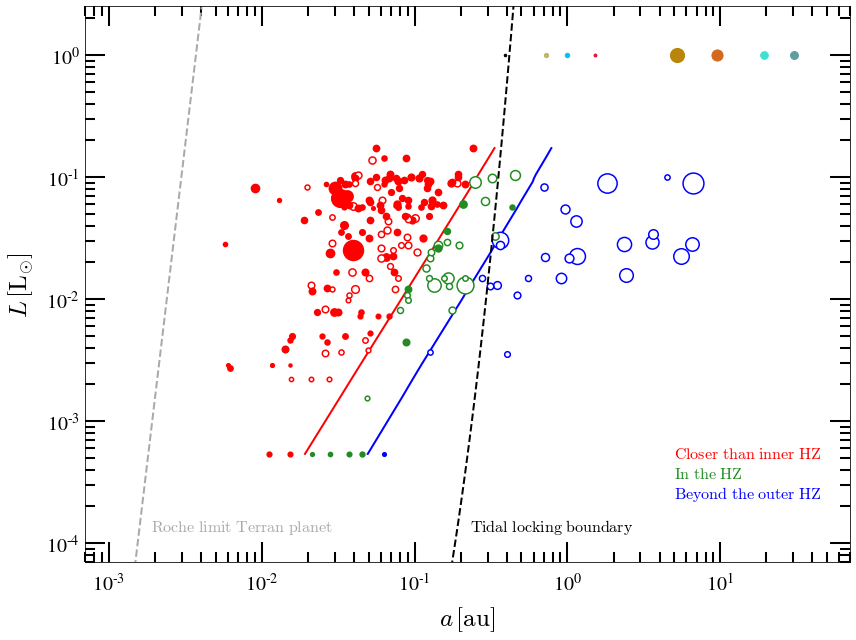

In [37]:
z_lines = 1
z_points = 2


fig, ax = plt.subplots(figsize=(12,9))

color_planets = 'forestgreen'
scale_factor = 20
corrfactor = 1./2.5



# HZ
ax.plot(HZ_a_Mdwarf_IHZ, \
         L_Lsun_interp(np.asarray(np.sort(star_prop['Teff']))), color='red', lw=2.0, zorder=z_lines)


ax.plot(HZ_a_Mdwarf_OHZ, \
         L_Lsun_interp(np.asarray(np.sort(star_prop['Teff']))), color='blue', lw=2.0, zorder=z_lines)





# Tidal locking models, Roche limit

ax.plot(a_TD, CTL_TD**idxMS, 'k--', lw=2.0);
#ax.plot(a_TD, CPL_TD**idxMS, 'k-', lw=2.0);

ax.plot(Roche_solid(REarth, Msun*(L_TD)**(1./3.5), MEarth), L_TD, color='darkgrey', lw = 2.0, ls = 'dashed')





# Planets


# Sort bubbles by decreasing mass to plot little ones on top
        
        
        
        
boil_inds = planet_M[wh_boil].argsort()[::-1]

for h in boil_inds:
    
    if ((planet_detect[wh_boil][h] == 'PT') |\
        (planet_detect[wh_boil][h] == 'X')  | (planet_detect[wh_boil][h] == 'PT+RV')):
        
        ax.scatter(planet_a[wh_boil][h], star_L[wh_boil][h], color='red', edgecolor='red',\
           lw=1.5, s=scale_factor*(planet_M[wh_boil][h])**(corrfactor), zorder=z_points);
        
    else:
        
        ax.scatter(planet_a[wh_boil][h], star_L[wh_boil][h], color='white', edgecolor='red',\
           lw=1.5, s=scale_factor*(planet_M[wh_boil][h])**(corrfactor), zorder=z_points);
        
        
        
        
fre_inds = planet_M[wh_freeze].argsort()[::-1]

for h in fre_inds:
    
    if ((planet_detect[wh_freeze][h] == 'PT') |\
        (planet_detect[wh_freeze][h] == 'X')  | (planet_detect[wh_freeze][h] == 'PT+RV')):
        
        ax.scatter(planet_a[wh_freeze][h], star_L[wh_freeze][h], color='blue', edgecolor='blue',\
           lw=1.5, s=scale_factor*(planet_M[wh_freeze][h])**(corrfactor), zorder=z_points);
        
    else:
        
        ax.scatter(planet_a[wh_freeze][h], star_L[wh_freeze][h], color='white', edgecolor='blue',\
           lw=1.5, s=scale_factor*(planet_M[wh_freeze][h])**(corrfactor), zorder=z_points);
        
        
        
        
hab_inds = planet_M[wh_habitable].argsort()[::-1]

for h in hab_inds:
    
    if ((planet_detect[wh_habitable][h] == 'PT') |\
        (planet_detect[wh_habitable][h] == 'X')  | (planet_detect[wh_habitable][h] == 'PT+RV')):
        
        ax.scatter(planet_a[wh_habitable][h], star_L[wh_habitable][h], color='forestgreen', edgecolor='forestgreen',\
           lw=1.5, s=scale_factor*(planet_M[wh_habitable][h])**(corrfactor), zorder=z_points);
        
    else:
        
        ax.scatter(planet_a[wh_habitable][h], star_L[wh_habitable][h], color='white', edgecolor='forestgreen',\
           lw=1.5, s=scale_factor*(planet_M[wh_habitable][h])**(corrfactor), zorder=z_points);




# SS planets

for ipl in range(8):
    ax.scatter(a_SS[ipl], 1.0, color=color_SS[ipl], edgecolor=color_SS[ipl], s=scale_factor*(m_SS[ipl])**(corrfactor),\
               zorder=z_points);


    


#ax.set_xlabel(r'$\rm{a \, [au]}$',fontsize = 25, labelpad=10);
ax.set_xlabel(r'$a \, \rm{[au]}$',fontsize = 25, labelpad=10);
ax.tick_params(axis='x', which='major', pad=10)
#ax.set_ylabel(r'$\rm{L \, [L_{\odot}]}$',fontsize = 25, labelpad=10)
ax.set_ylabel(r'$L \, \rm{[L_{\odot}]}$',fontsize = 25, labelpad=10)
ax.tick_params(axis='y', which='major', pad=5)

for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(20);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(20); 
            
            
ax.tick_params(which='both', width=2.05);
ax.tick_params(which='major', length=20);
ax.tick_params(which='minor', length=10);
#ax.set_xlim(7.0E-4, 4.5E1);
ax.set_xlim(7.0E-4, 7.0E1);
ax.minorticks_on();
ax.set_xscale('log');
ax.set_yscale('log');
ax.set_ylim(7.E-5, 2.5E0);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')


ax.text(1.9E-3, 1.25E-4, r'$\rm{Roche \,\, limit \,\, Terran \,\, planet}$', color='darkgrey', fontsize=16)
ax.text(2.3E-1, 1.25E-4, r'$\rm{Tidal \,\, locking \,\, boundary}$', color='black', fontsize=16)


ax.text(5.E0, 5.E-4, r'$\rm{Closer \,\, than \,\, inner \,\, HZ}$', color='red', fontsize=16)
ax.text(5.E0, 3.40E-4, r'$\rm{In \,\, the \,\, HZ}$', color='forestgreen', fontsize=16)
ax.text(5.E0, 2.35E-4, r'$\rm{Beyond \,\, the \,\, outer \,\, HZ}$', color='blue', fontsize=16)

fig.tight_layout()
fig.savefig('HZ_plot_paper.pdf', bbox_to_inches = 'tight')

## Exomoon calculations from [Piro+18a](https://ui.adsabs.harvard.edu/abs/2018AJ....156...54P/abstract) 

In [38]:
dEarthMoon = 3.84399E8 # m

# Maximum and minimum allowed distances for the exomoon

# Max: Eq 1 from Piro+18a
f = 0.49
acrit = f * (planet_a * One_AU) * ( planet_M * MEarth / (3. *  star_M * Msun ) )**(1./3.) / dEarthMoon

###################################################################################################################################

# Min: Eq 32 from Piro+18a
#Rm = 0.462 * (1 + Mp/Mm)**-1/3 * at
#rhoMoon = 3.34E3 # kg/m3
rhoMoon_example = 1.88E3 # kg/m3 Titan Typical density ~ 2-3 g/cm3


at = 1.34 * (planet_M * MEarth / rhoMoon_example)**(1./3.) / dEarthMoon

In [39]:
#### Our tables have periods already. This is a check using Kepler's third law ####


#### P0 will be given by Kepler's third law, assuming tidal locking for the planets ####
#### A few of them might not be tidally locked, but they will receive no special treatment ####

G = 6.673E-11 # N m2 kg-2
T = 2 * np.pi * np.sqrt( (planet_a * One_AU) **3 / (G* (star_M*Msun + planet_M*MEarth) ) ) 

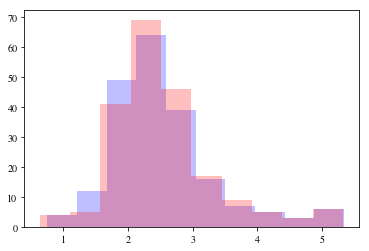

In [40]:
plt.hist(np.log10(T / 3600.), color='blue', alpha=0.25);
plt.hist(np.log10(planet_prop['P_day'] *24.), color='red', alpha=0.25);

## Exomoon's fate: will it fall back into the exoplanet or will it be stripped away?

In [41]:
#If a_m > a_{crit,m} then the moon is eventually stripped
#If a_m < a_{crit,m} then the moon eventually falls back into the planet

# Eq 30 from Piro+18a

MMoon = 1.3452E23 # kg # Titan
G = 6.673E-11 # N m2 kg-2
h_to_s = 3600.
d_to_s = 86400.

P0 = planet_prop['P_day'] # Switch to 3h if desired

lambda_r_sample = np.zeros(len(planet_R))

for i, el in enumerate(planet_R):
    
    lambda_r_sample[i] = lambda_r(el)

###################################################################################################################################

am = 4 * np.pi**2 * lambda_r_sample**2 * (planet_M * MEarth) * (planet_R * REarth) **4 / \
(G * MMoon**2 * (P0 * d_to_s)**2 ) * 1 / dEarthMoon

In [42]:
# List intersections

wh_moon_strip = list(np.where(am > acrit)[0])
wh_moon_fall = list(np.where(am < acrit)[0])


wh_habitable_moon_strip = sorted(list(set(wh_habitable).intersection(wh_moon_strip)))
wh_habitable_moon_fall = sorted(list(set(wh_habitable).intersection(wh_moon_fall)))
wh_habitable_PT_moon_strip = sorted(list(set(wh_habitable_PT).intersection(wh_moon_strip)))
wh_habitable_PT_moon_fall = sorted(list(set(wh_habitable_PT).intersection(wh_moon_fall)))
wh_habitable_RV_moon_strip = sorted(list(set(wh_habitable_RV).intersection(wh_moon_strip)))
wh_habitable_RV_moon_fall = sorted(list(set(wh_habitable_RV).intersection(wh_moon_fall)))

wh_boil_moon_strip = sorted(list(set(wh_boil).intersection(wh_moon_strip)))
wh_boil_moon_fall = sorted(list(set(wh_boil).intersection(wh_moon_fall)))
wh_boil_PT_moon_strip = sorted(list(set(wh_boil_PT).intersection(wh_moon_strip)))
wh_boil_PT_moon_fall = sorted(list(set(wh_boil_PT).intersection(wh_moon_fall)))
wh_boil_RV_moon_strip = sorted(list(set(wh_boil_RV).intersection(wh_moon_strip)))
wh_boil_RV_moon_fall = sorted(list(set(wh_boil_RV).intersection(wh_moon_fall)))


wh_freeze_moon_strip = sorted(list(set(wh_freeze).intersection(wh_moon_strip)))
wh_freeze_moon_fall = sorted(list(set(wh_freeze).intersection(wh_moon_fall)))
wh_freeze_PT_moon_strip = sorted(list(set(wh_freeze_PT).intersection(wh_moon_strip)))
wh_freeze_PT_moon_fall = sorted(list(set(wh_freeze_PT).intersection(wh_moon_fall)))
wh_freeze_RV_moon_strip = sorted(list(set(wh_freeze_RV).intersection(wh_moon_strip)))
wh_freeze_RV_moon_fall = sorted(list(set(wh_freeze_RV).intersection(wh_moon_fall)))

## Exomoon migration timescale (taumig)

In [43]:
# Consider k2, Q and tau for arbitrary planets (i.e., not assuming they are rocky)

# Eq 25 from Piro +18a

k2_Earth = 0.3
tau_Earth = 638 #s
Q_Earth = 12.0


k2_r_sample = np.zeros(len(planet_R))

for i, el in enumerate(planet_R):
    
    k2_r_sample[i] = k2_r(el)
    
    
    
Q_r_sample = np.zeros(len(planet_R))

for i, el in enumerate(planet_R):
    
    Q_r_sample[i] = Q_r(el)
    
    


# If a_m > a_{crit,m} when the moon is eventually stripped, better use a_{crit,m} to estimate tau_mig than a_m

am[wh_moon_strip] = acrit[wh_moon_strip]
taumig = 2.5E11 * (k2_Earth / k2_r_sample) * (Q_r_sample / Q_Earth) * \
(MMoon / MMoon)**(-1.0) * (planet_R)**(-5.0) * (am)**(8.0) # yr

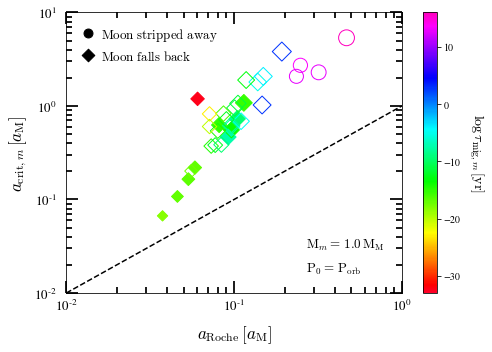

In [44]:
fig, ax = plt.subplots(figsize=(7,5))

scale_factor = 60
corrfac = 20
#colma = 'gist_rainbow'
colma = 'gist_rainbow'


# Some lists might be empty (try except)
# Problems when trying to set edgecolor (black by default) to colormap facecolor in filled circles (PT)
# facecolors='None' for empty circles with colormap edgecolor (RV)


try:
    
        ax.scatter(at[wh_habitable_PT_moon_strip], 
                   acrit[wh_habitable_PT_moon_strip],
                   s = scale_factor*np.log10(planet_M[wh_habitable_PT_moon_strip]*corrfac),
                   c=np.log10(taumig[wh_habitable_PT_moon_strip]),
                   vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                   vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))),
                   cmap=colma, zorder=z_points, marker='o', lw=0.1);

        PT_strip = ax.scatter(at[wh_habitable_PT_moon_strip], 
                              acrit[wh_habitable_PT_moon_strip],
                              s = scale_factor*np.log10(planet_M[wh_habitable_PT_moon_strip]*corrfac),
                              c=np.log10(taumig[wh_habitable_PT_moon_strip]),
                              facecolors='None',
                              vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                              vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))),
                              cmap=colma, zorder=z_points, marker='o');
        
        PT_strip.set_facecolor('none')

except ValueError:

        pass

try:

        RV_strip = ax.scatter(at[wh_habitable_RV_moon_strip], 
                              acrit[wh_habitable_RV_moon_strip],
                              s = scale_factor*np.log10(planet_M[wh_habitable_RV_moon_strip]*corrfac),
                              c=np.log10(taumig[wh_habitable_RV_moon_strip]),
                              facecolors='None',
                              vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                              vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))),
                              cmap=colma, zorder=z_points, marker='o');
        
        RV_strip.set_facecolor('none')

except ValueError:

        pass

try:
    
        ax.scatter(at[wh_habitable_PT_moon_fall], 
                   acrit[wh_habitable_PT_moon_fall],
                   s = scale_factor*np.log10(planet_M[wh_habitable_PT_moon_fall]*corrfac),
                   c=np.log10(taumig[wh_habitable_PT_moon_fall]),
                   vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                   vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))),
                   cmap=colma, zorder=z_points, marker='D', lw=0.1);

        PT_fall = ax.scatter(at[wh_habitable_PT_moon_fall], 
                             acrit[wh_habitable_PT_moon_fall],
                             s = scale_factor*np.log10(planet_M[wh_habitable_PT_moon_fall]*corrfac),
                             c=np.log10(taumig[wh_habitable_PT_moon_fall]),
                             facecolors='None',
                             vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                             vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))),
                             cmap=colma, zorder=z_points, marker='D');
        
        PT_fall.set_facecolor('none')

except ValueError:

        pass

try:

        RV_fall = ax.scatter(at[wh_habitable_RV_moon_fall], 
                             acrit[wh_habitable_RV_moon_fall],
                             s = scale_factor*np.log10(planet_M[wh_habitable_RV_moon_fall]*corrfac),
                             c=np.log10(taumig[wh_habitable_RV_moon_fall]),
                             facecolors='None',
                             vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                             vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))),
                             cmap=colma, zorder=z_points, marker='D');
        
        RV_fall.set_facecolor('none')

except ValueError:

        pass


    
    


# For the colorbar

sc = ax.scatter(1.E11 + at[wh_habitable], acrit[wh_habitable], 
                s = scale_factor*np.log10(planet_M[wh_habitable]*corrfac),
                c=np.log10(taumig[wh_habitable]), vmin=np.floor(np.log10(np.min(taumig[wh_habitable]))),
                vmax=np.ceil(np.log10(np.max(taumig[wh_habitable]))), cmap=colma, zorder=z_points, marker='o');


cbar = fig.colorbar(sc)#, orientation = 'horizontal')
cbar.set_label(r'$\mathrm{\log} \, \tau_{\mathrm{mig},m} \, [\mathrm{yr}]}$',\
               rotation=270, fontsize = 14, labelpad=25)



ax.plot((1.E-2, 1.E0), (1.E-2, 1.E0), color='black', ls='dashed', lw=1.5, zorder=z_lines)



ax.set_xlabel(r'$a_{\rm{Roche}} \, [a_{\rm{M}}]$',fontsize = 17, labelpad=10)
ax.tick_params(axis='x', which='major', pad=5)
ax.set_ylabel(r'$a_{\mathrm{crit},m} \, [a_{\rm{M}}]$',fontsize = 17, labelpad=5);
ax.tick_params(axis='y', which='major', pad=10)

for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(13);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(13); 
            
            
ax.tick_params(which='both', width=1.75);
ax.tick_params(which='major', length=12);
ax.tick_params(which='minor', length=6);

ax.set_xscale('log');
ax.set_yscale('log');

ax.set_xlim(1.E-2, 1.E0);
ax.set_ylim(1.E-2, 1.E1);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')



# For the legend

ax.scatter(1.35E-2, 6.0E0, s=80, color='black', marker='o')
ax.scatter(1.35E-2, 3.5E0, s=80, color='black', marker='D')

ax.text(1.6E-2, 5.3E0, r'$\rm{Moon \ stripped \ away}$', fontsize=13)
ax.text(1.6E-2, 3.1E0, r'$\rm{Moon \ falls \ back}$', fontsize=13)

ax.text(2.7E-1, 3.0E-2, r'$\mathrm{M}_{m} = \, 1.0 \, \mathrm{M_{M}}$', fontsize=13)
ax.text(2.7E-1, 1.7E-2, r'$\rm{P_{0} = \, P_{orb}}$', fontsize=13)


fig.tight_layout()
fig.savefig('Moon_dist_range_stripfall_taumig.pdf', bbox_to_inches = 'tight')

In [45]:
print wh_habitable_PT_moon_fall

print wh_habitable_PT_moon_strip

print wh_habitable_RV_moon_fall

print wh_habitable_RV_moon_strip

[3, 17, 75, 76, 83, 178, 200, 201, 202, 203]
[]
[15, 20, 26, 28, 39, 42, 48, 51, 71, 92, 102, 105, 112, 114, 115, 123, 124, 147, 186]
[16, 80, 194, 195]


/home/hector/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


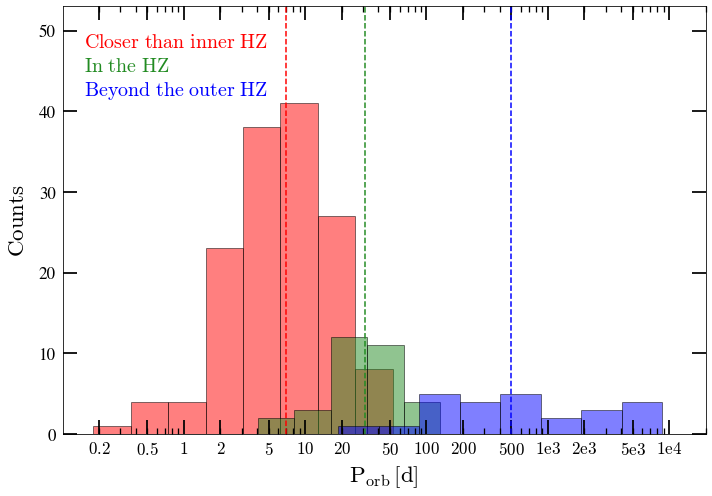

In [46]:
fig, ax = plt.subplots(figsize=(10,7))


#ax.hist(planet_prop['P_day'][wh_boil], bins=fd(planet_prop['P_day'][wh_boil]), color='red', alpha=0.5);
#ax.hist(planet_prop['P_day'][wh_habitable], bins=fd(planet_prop['P_day'][wh_habitable]), color='forestgreen', alpha=0.5);
#ax.hist(planet_prop['P_day'][wh_freeze], bins=fd(planet_prop['P_day'][wh_freeze]), color='blue', alpha=0.5);


ax.hist(planet_prop['P_day'][wh_boil], \
        bins=10 ** np.linspace(np.log10(min(planet_prop['P_day'][wh_boil])),\
                               np.log10(max(planet_prop['P_day'][wh_boil])), 9), color='red',\
        edgecolor='black', alpha=0.5);

ax.hist(planet_prop['P_day'][wh_habitable], \
        bins=10 ** np.linspace(np.log10(min(planet_prop['P_day'][wh_habitable])),\
                               np.log10(max(planet_prop['P_day'][wh_habitable])), 6), color='forestgreen',\
        edgecolor='black', alpha=0.5);

ax.hist(planet_prop['P_day'][wh_freeze], \
        bins=10 ** np.linspace(np.log10(min(planet_prop['P_day'][wh_freeze])),\
                               np.log10(max(planet_prop['P_day'][wh_freeze])), 9), color='blue',\
        edgecolor='black', alpha=0.5);

#ax.set_xlim(0., 150.);

ax.set_xlabel(r'$\rm{P_{orb} \, [d]}$', fontsize=23, labelpad=5);
ax.set_ylabel(r'$\rm{Counts}$', fontsize=23, labelpad=10);
ax.tick_params(axis='both', which='major', labelsize=17, length=14, width=1.75, pad = 7);
#ax.tick_params(which='both', width=1.75);
#ax.tick_params(which='major', length=12);
ax.tick_params(which='minor', length=6, width=1.3);


ax.axvline(np.median(planet_prop['P_day'][wh_boil]), color='red', lw=1.5, ls='dashed')
ax.axvline(np.median(planet_prop['P_day'][wh_habitable]), color='forestgreen', lw=1.5, ls='dashed')
ax.axvline(np.median(planet_prop['P_day'][wh_freeze]), color='blue', lw=1.5, ls='dashed')


ax.set_xscale('log');
ax.set_xlim(0.1, 2.E4);
ax.set_ylim(0., 53);
ax.set_xticks([0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
ax.set_xticklabels([r'$\rm{0.2}$', r'$\rm{0.5}$', r'$\rm{1}$', r'$\rm{2}$', r'$\rm{5}$', r'$\rm{10}$',\
                    r'$\rm{20}$', r'$\rm{50}$', r'$\rm{100}$', r'$\rm{200}$', r'$\rm{500}$',\
                    r'$\rm{1e3}$', r'$\rm{2e3}$', r'$\rm{5e3}$', r'$\rm{1e4}$'], fontsize=22)


#ax.set_yticklabels([r'$\rm{0}$', r'$\rm{5}$', r'$\rm{10}$', r'$\rm{15}$',\
#                    r'$\rm{20}$', r'$\rm{25}$', r'$\rm{30}$', r'$\rm{35}$', r'$\rm{40}$'], fontsize=22)
#ax.set_yscale('log');


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')



ax.text(1.5E-1, 48., r'$\rm{Closer \,\, than \,\, inner \,\, HZ}$', color='red', fontsize=20)
ax.text(1.5E-1, 45., r'$\rm{In \,\, the \,\, HZ}$', color='forestgreen', fontsize=20)
ax.text(1.5E-1, 42., r'$\rm{Beyond \,\, the \,\, outer \,\, HZ}$', color='blue', fontsize=20)


fig.tight_layout()
plt.savefig('Porb_log.pdf', bbox_to_inches = 'tight');

In [47]:
planet_name_finalan = []
planet_a_finalan = []
P0_finalan = []
star_M_finalan = []
planet_M_finalan = []
planet_R_finalan = []
at_finalan = []
acrit_finalan = []
am_finalan = []
taumig_finalan = []

k2_finalan = []
Q_finalan = []
lambda_finalan = []




for h, hh in enumerate(planet_name):

    
    if ( (taumig[h] >= 1.E8) and (h in wh_habitable) ) :
        
        
        planet_name_finalan.append(hh + ' ' +  planet_char[h])
        planet_a_finalan.append(planet_a[h])
        P0_finalan.append(P0[h]) 
        star_M_finalan.append(star_M[h])
        planet_M_finalan.append(planet_M[h]) 
        planet_R_finalan.append(planet_R[h]) 
        at_finalan.append(at[h])
        acrit_finalan.append(acrit[h]) 
        am_finalan.append(am[h]) 
        taumig_finalan.append(taumig[h])
        k2_finalan.append(k2_r_sample[h])
        Q_finalan.append(Q_r_sample[h])
        lambda_finalan.append(lambda_r_sample[h])

In [48]:
print 'Name', '\b', 'Planet', '\b', 'a', '\b', 'P0', '\b', 'M*', '\b', 'Mp', '\b', 'Rp',\
'\b', 'at', '\b', 'acrit', '\b', 'am', '\b', 'taumig'

print ('----------------------------------------------------------------')

for h, hh in enumerate(planet_name_finalan):

            print hh,\
        "%.2f" % planet_a_finalan[h], '\b', "%.0f" % P0_finalan[h], '\b', "%.2f" % star_M_finalan[h],'\b',\
        "%.1f" % planet_M_finalan[h], '\b', "%.1f" % planet_R_finalan[h], '\b',\
        "%.2f" % at_finalan[h], '\b', "%.2f" % acrit_finalan[h], '\b', "%.2f" % am_finalan[h], '\b',\
        "%.0f" % (1.E-9*taumig_finalan[h])

Name  Planet  a  P0  M*  Mp  Rp  at  acrit  am  taumig
----------------------------------------------------------------
CD-23 1056 b 0.25  53  0.62  114.0  13.1  0.25  2.72  2.72  32934
Ross 1003 b 0.17  41  0.35  96.7  11.9  0.24  2.08  2.08  5903
IL Aqr b 0.21  61  0.34  760.9  13.1  0.47  5.36  5.36  7356120
IL Aqr c 0.13  30  0.34  241.5  13.7  0.32  2.29  2.29  6610


## Exomoon detection by radial velocity or transit

In [49]:
def detect_moon_pt(r = [], R = []):
    
    '''
    m_0 - m_transit = Delta m = -2.5 * log(L_0/L_transit)
    
    returns m_0 - m_transit
    '''
    
    import numpy as np
    
    r = np.asarray(r)
    R = np.asarray(R)
    
    return 2.5 * np.log10(1 - r**2/R**2)



def detect_moon_rv(a = [], m = [], M = []):
    
    '''
    K = (2 * pi * G / P)**(1/3) * m * sin(i) / (m + M)**(2/3) * 1 / (1 - e**2)**(1/2)
    
    P = 2 * pi * ( a**3 / ( G * (m+M) ) )**(1/2) ->
    
    (2* pi * G / P)**(1/3) = (G / a)**(1/2) * (m + M)**(1/6) ->
    
    K = (G / a)**(1/2) * m * sin(i) / (m+M)**(1/2) * 1 / (1 - e**2)**(1/2)
    
    returns K/sin(i), i.e., an upper limit for K, assuming zero eccentricity
    '''
    
    a = np.asarray(a)
    m = np.asarray(m)
    M = np.asarray(M)
    
    G = 6.674E-11 # N*kg–2*m2. 
    
    return (G / a)**(1./2.) * m / (m+M)**(1./2.)



def moon_period(a = [], m = [], M = []):
    
    '''
    K = (2 * pi * G / P)**(1/3) * m * sin(i) / (m + M)**(2/3) * 1 / (1 - e**2)**(1/2)
    
    P = 2 * pi * ( a**3 / ( G * (m+M) ) )**(1/2) ->
    
    (2* pi * G / P)**(1/3) = (G / a)**(1/2) * (m + M)**(1/6) ->
    
    K = (G / a)**(1/2) * m * sin(i) / (m+M)**(1/2) * 1 / (1 - e**2)**(1/2)
    
    returns K/sin(i), i.e., an upper limit for K, assuming zero eccentricity
    '''
    
    import numpy as np
    
    a = np.asarray(a)
    m = np.asarray(m)
    M = np.asarray(M)
    
    G = 6.674E-11 # N*kg–2*m2. 
    
    return 2 * np.pi * ( a**3 / ( G * (m+M) ) )**(1./2.) * 1./d_to_s

In [50]:
print "%.1f" % moon_period(dEarthMoon, MMoon, MEarth)

27.1


In [51]:
# Greatest possible changes in magnitude / radial velocity


mass_Ganymede = 148.19E21 # kg
mass_Titania = 3.53E21 # kg

radius_Ganymede = 2634.10E3/REarth # REarth
radius_Titania = 788.40E3/REarth # REarth

In [52]:
for h, hh in enumerate(planet_M_finalan):
        
    print planet_name_finalan[h],\
    "%.2f" % moon_period(at_finalan[h]*dEarthMoon, mass_Ganymede, hh*MEarth),\
    "%.2f" % moon_period(acrit_finalan[h]*dEarthMoon, mass_Titania, hh*MEarth),\
    "%.2f" % moon_period(acrit_finalan[h]*dEarthMoon, mass_Ganymede, hh*MEarth),\
    "%.2f" % moon_period(at_finalan[h]*dEarthMoon, mass_Titania, hh*MEarth)

CD-23 1056 b 0.32 11.53 11.53 0.32
Ross 1003 b 0.32 8.34 8.34 0.32
IL Aqr b 0.32 12.34 12.34 0.32
IL Aqr c 0.32 6.11 6.11 0.32


In [53]:
for h, hh in enumerate(planet_M_finalan):
        
    print planet_name_finalan[h],\
    "%.2f" % detect_moon_rv(acrit_finalan[h]*dEarthMoon, mass_Titania, hh*MEarth),\
    "%.2f" % detect_moon_rv(at_finalan[h]*dEarthMoon, mass_Ganymede, hh*MEarth)

CD-23 1056 b 0.03 4.74
Ross 1003 b 0.04 5.29
IL Aqr b 0.01 1.34
IL Aqr c 0.03 2.88


In [54]:
Lcomp = Table.read(path_data + 'hmr18.LM_comparison.v05.csv', format='ascii.csv')

print Lcomp.colnames

Lours = Lcomp['L_hmr']
eLours = Lcomp['eL_hmr']

Llit = Lcomp['L_lit']
eLlit = Lcomp['eL_lit']


Mours = Lcomp['M_hmr']
eMours = Lcomp['eM_hmr']

Mlit = Lcomp['M_lit']
eMlit = Lcomp['eM_lit']

['Name', 'L_hmr', 'eL_hmr', 'L_lit', 'eL_lit', 'M_hmr', 'eM_hmr', 'M_lit', 'eM_lit', 'Ref', 'Ref_L', 'Ref_M', 'Comments']


In [55]:
xeq = np.linspace(1.E0, 3.E3, 10000)
yeq = np.linspace(1.E0, 3.E3, 10000)
yp20per = yeq*1.2
ym20per = yeq*0.8

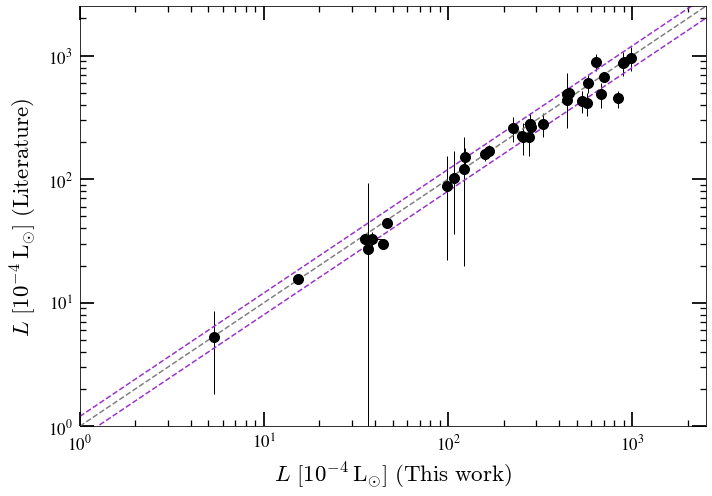

In [56]:
fig, ax = plt.subplots(figsize=(10,7))


#sc_l = ax.scatter(Lours, Llit, s = 100, color='black', edgecolor='black', zorder=z_points, marker='o');

ax.errorbar(Lours, Llit, xerr=eLours, yerr=eLlit, color = 'black', ecolor='black',
            fmt='o', markersize=10, zorder=z_points, elinewidth=1.0, lw=1.0);


ax.plot(xeq, yeq, color='grey', lw=1.5, ls='dashed');
# \pm 20%
ax.plot(xeq, yp20per, color='darkorchid', lw=1.5, ls='dashed');
ax.plot(xeq, ym20per, color='darkorchid', lw=1.5, ls='dashed');


ax.set_xlabel(r'$L \,\, \rm{[10^{-4} \, L_{\odot}] \ (This \ work)}$', fontsize=23, labelpad=5);
ax.set_ylabel(r'$L \,\, \rm{[10^{-4} \, L_{\odot}] \ (Literature)}$', fontsize=23, labelpad=10);
ax.tick_params(axis='both', which='major', labelsize=17, length=14, width=1.75, pad = 7);
#ax.tick_params(which='both', width=1.75);
#ax.tick_params(which='major', length=12);
ax.tick_params(which='minor', length=6, width=1.3);


ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlim(1.E0, 2.5E3);
ax.set_ylim(1.E0, 2.5E3);
#ax.set_xticks([0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
#ax.set_xticklabels([r'$\rm{0.2}$', r'$\rm{0.5}$', r'$\rm{1}$', r'$\rm{2}$', r'$\rm{5}$', r'$\rm{10}$',\
#                    r'$\rm{20}$', r'$\rm{50}$', r'$\rm{100}$', r'$\rm{200}$', r'$\rm{500}$',\
#                    r'$\rm{1e3}$', r'$\rm{2e3}$', r'$\rm{5e3}$', r'$\rm{1e4}$'], fontsize=22)


#ax.set_yticklabels([r'$\rm{0}$', r'$\rm{5}$', r'$\rm{10}$', r'$\rm{15}$',\
#                    r'$\rm{20}$', r'$\rm{25}$', r'$\rm{30}$', r'$\rm{35}$', r'$\rm{40}$'], fontsize=22)
#ax.set_yscale('log');


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')


fig.tight_layout()
plt.savefig('Lcomp_log.pdf', bbox_to_inches = 'tight');

In [57]:
xeq = np.linspace(0., 0.8, 10000)
yeq = np.linspace(0., 0.8, 10000)
yp20per = yeq*1.2
ym20per = yeq*0.8

/home/hector/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


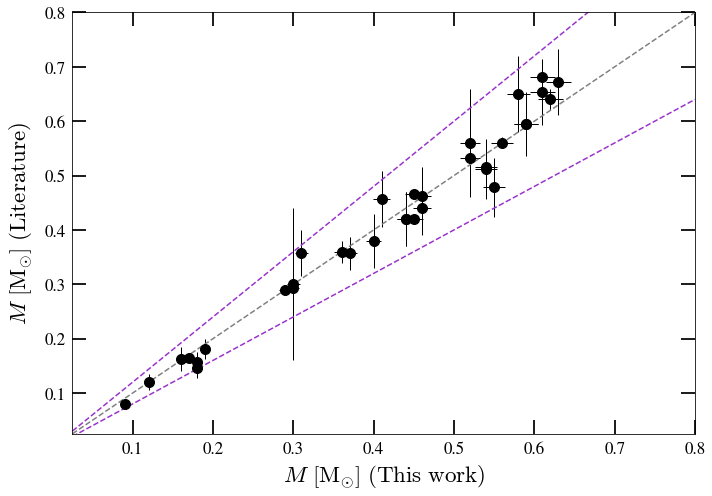

In [58]:
fig, ax = plt.subplots(figsize=(10,7))


#sc_l = ax.scatter(Lours, Llit, s = 100, color='black', edgecolor='black', zorder=z_points, marker='o');

ax.errorbar(Mours, Mlit, xerr=eMours, yerr=eMlit, color = 'black', ecolor='black',
            fmt='o', markersize=10, zorder=z_points, elinewidth=1.0, lw=1.0);


ax.plot(xeq, yeq, color='grey', lw=1.5, ls='dashed');
# \pm 20%
ax.plot(xeq, yp20per, color='darkorchid', lw=1.5, ls='dashed');
ax.plot(xeq, ym20per, color='darkorchid', lw=1.5, ls='dashed');


ax.set_xlabel(r'$M \,\, \rm{[M_{\odot}] \ (This \ work)}$', fontsize=23, labelpad=5);
ax.set_ylabel(r'$M \,\, \rm{[M_{\odot}] \ (Literature)}$', fontsize=23, labelpad=10);
ax.tick_params(axis='both', which='major', labelsize=17, length=14, width=1.75, pad = 7);
#ax.tick_params(which='both', width=1.75);
#ax.tick_params(which='major', length=12);
ax.tick_params(which='minor', length=6, width=1.3);


ax.set_xlim(0.025, 0.8);
ax.set_ylim(0.025, 0.8);
#ax.set_xticks([0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
#ax.set_xticklabels([r'$\rm{0.2}$', r'$\rm{0.5}$', r'$\rm{1}$', r'$\rm{2}$', r'$\rm{5}$', r'$\rm{10}$',\
#                    r'$\rm{20}$', r'$\rm{50}$', r'$\rm{100}$', r'$\rm{200}$', r'$\rm{500}$',\
#                    r'$\rm{1e3}$', r'$\rm{2e3}$', r'$\rm{5e3}$', r'$\rm{1e4}$'], fontsize=22)


#ax.set_yticklabels([r'$\rm{0}$', r'$\rm{5}$', r'$\rm{10}$', r'$\rm{15}$',\
#                    r'$\rm{20}$', r'$\rm{25}$', r'$\rm{30}$', r'$\rm{35}$', r'$\rm{40}$'], fontsize=22)
#ax.set_yscale('log');


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')


fig.tight_layout()
plt.savefig('Mcomp.pdf', bbox_to_inches = 'tight');

In [59]:
#ID, star, planet, star_M [MSun] ,planet_M [MEarth], planet_R [REarth], planet_a [au], Porb [d], 
#at, acrit, am, taumig [Gyr], k2, Q, lambda


with open('PHZ_parameters_P0.csv', 'w') as f:
    
    row = csv.writer(f)
    
    for p, pp in enumerate(planet_name[wh_habitable]):
        row.writerow([ planet_prop[wh_habitable]['ID'][p],
                      pp, 
                      planet_prop[wh_habitable]['Planet'][p],
                      "%.4f" % star_M[wh_habitable][p] ,
                      "%.4f" % planet_M[wh_habitable][p], 
                      "%.4f" % planet_R[wh_habitable][p],
                      "%.4e" % planet_a[wh_habitable][p], 
                      "%.4f" % planet_prop['P_day'][wh_habitable][p],
                      "%.4e" % at[wh_habitable][p], 
                      "%.4e" % acrit[wh_habitable][p], 
                      "%.4e" % am[wh_habitable][p],
                      "%.4e" % (1.E-9*taumig[wh_habitable][p]),
                      "%.4f" % k2_r_sample[wh_habitable][p], 
                      "%.4e" % Q_r_sample[wh_habitable][p],
                      "%.4f" % lambda_r_sample[wh_habitable][p] ])

In [60]:
wh_PTRV = np.where(planet_detect == 'PT+RV' )[0]
wh_habitable_PTRV = sorted(list(set(wh_habitable).intersection(wh_PTRV)))

for h, hh in enumerate(planet_name[wh_habitable_PTRV]):
    
    print hh + '\t' +  planet_char[wh_habitable_PTRV][h]

LHS 1140	b
PM J11293-0127	d
PM J11302+0735	b


## Plot exoplanets with am > at

In [61]:
Wh_habitable = list(np.where(am[wh_habitable] - at[wh_habitable] > 0.)[0])


Wh_habitable_PT_moon_strip = \
list(np.where(am[wh_habitable_PT_moon_strip] - at[wh_habitable_PT_moon_strip] > 0.)[0])

Wh_habitable_RV_moon_strip = \
list(np.where(am[wh_habitable_RV_moon_strip] - at[wh_habitable_RV_moon_strip] > 0.)[0])


Wh_habitable_PT_moon_fall = \
list(np.where(am[wh_habitable_PT_moon_fall] - at[wh_habitable_PT_moon_fall] > 0.)[0])

Wh_habitable_RV_moon_fall = \
list(np.where(am[wh_habitable_RV_moon_fall] - at[wh_habitable_RV_moon_fall] > 0.)[0])

In [62]:
##### Check in which cases am < at

for i, el in enumerate(at[wh_habitable]):
    
    
    if np.heaviside(am[wh_habitable][i] - el, 0) == 1.0:
    
        print planet_name[wh_habitable][i] + ' ' + planet_char[wh_habitable][i],\
        '\t', "%.2e" % am[wh_habitable][i], '' ,"%.2e" % el, "%.2e" % (1.E-9 * taumig[wh_habitable][i]), 'YES'

CD-23 1056 b 	2.72e+00  2.49e-01 3.29e+04 YES
Ross 1003 b 	2.08e+00  2.35e-01 5.90e+03 YES
IL Aqr b 	5.36e+00  4.68e-01 7.36e+06 YES
IL Aqr c 	2.29e+00  3.19e-01 6.61e+03 YES


In [63]:
##### Check in which cases am > at

for i, el in enumerate(at[wh_habitable]):
    
    
    if np.heaviside(am[wh_habitable][i] - el, 0) == 0.0:
    
        print planet_name[wh_habitable][i] + ' ' + planet_char[wh_habitable][i],\
        '\t', "%.2e" % am[wh_habitable][i], '' ,"%.2e" % el, "%.2e" % (1.E-9 * taumig[wh_habitable][i]), 'NO'

LHS 1140 b 	7.01e-04  9.64e-02 2.04e-23 NO
GJ 96 b 	1.11e-02  1.38e-01 9.77e-15 NO
LP 413-32 B b 	4.92e-04  8.14e-02 6.88e-25 NO
LPM 178 c 	4.52e-03  9.71e-02 1.62e-17 NO
LP 834-042 b 	1.09e-01  1.47e-01 7.81e-07 NO
LP 834-042 d 	1.63e-03  1.01e-01 4.33e-21 NO
LP 776-27 c 	4.23e-03  9.52e-02 1.01e-17 NO
Kapteyn's star b 	4.11e-04  8.65e-02 1.19e-25 NO
BD-06 1339 c 	1.14e-01  1.93e-01 8.70e-07 NO
Luyten's star b 	5.67e-04  7.30e-02 3.47e-24 NO
Innes' star b 	1.18e-02  1.10e-01 2.40e-14 NO
PM J11293-0127 d 	4.47e-04  1.14e-01 4.31e-25 NO
PM J11302+0735 b 	2.85e-03  1.04e-01 4.44e-19 NO
LP 613-39 b 	5.26e-03  9.23e-02 6.64e-17 NO
Proxima Centauri b 	2.05e-04  5.55e-02 4.70e-27 NO
HD 147379 b 	1.59e-02  1.49e-01 1.65e-13 NO
V2306 Oph c 	1.19e-03  7.72e-02 8.47e-22 NO
HD 156384 C c 	6.79e-04  8.00e-02 8.20e-24 NO
HD 156384 C e 	5.02e-05  7.14e-02 1.23e-32 NO
HD 156384 C f 	1.11e-04  7.14e-02 8.47e-30 NO
CD-44 11909 b 	2.63e-03  8.40e-02 3.56e-19 NO
CD-44 11909 c 	1.60e-03  1.05e-01 3.30e-21

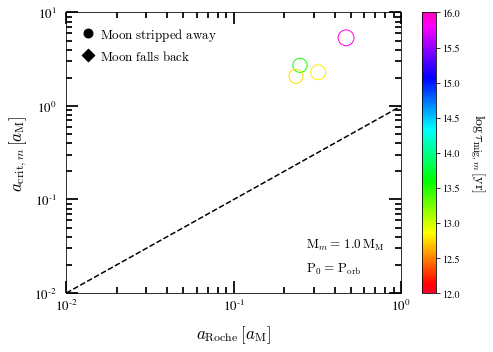

In [64]:
fig, ax = plt.subplots(figsize=(7,5))

scale_factor = 60
corrfac = 20
#colma = 'gist_rainbow'
colma = 'gist_rainbow'


# http://matplotlib.org/examples/color/colormaps_reference.html
# http://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter

# Some lists might be empty (try except)
# Problems when trying to set edgecolor (black by default) to colormap facecolor in filled circles (PT)
# facecolors='None' for empty circles with colormap edgecolor (RV)


try:
    
        ax.scatter(at[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip], 
                   acrit[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip],
                   s = scale_factor*
                   np.log10(planet_M[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip]*corrfac),
                   c=np.log10(taumig[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip]),
                   vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))),
                   vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))),
                   cmap=colma, zorder=z_points, marker='o', lw=0.1);

        PT_strip = ax.scatter(at[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip], acrit[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip], \
                        s = scale_factor*np.log10(planet_M[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip]*corrfac),\
                        c=np.log10(taumig[wh_habitable_PT_moon_strip][Wh_habitable_PT_moon_strip]), \
                        facecolors='None', \
                        vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))), \
                        vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))), \
                        cmap=colma, zorder=z_points, marker='o');
        
        PT_strip.set_facecolor('none')

except ValueError:

        pass

try:

        RV_strip = ax.scatter(at[wh_habitable_RV_moon_strip][Wh_habitable_RV_moon_strip], 
                              acrit[wh_habitable_RV_moon_strip][Wh_habitable_RV_moon_strip],
                              s = scale_factor*
                              np.log10(planet_M[wh_habitable_RV_moon_strip][Wh_habitable_RV_moon_strip]*corrfac),
                              c=np.log10(taumig[wh_habitable_RV_moon_strip][Wh_habitable_RV_moon_strip]),
                              facecolors='None',
                              vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))),
                              vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))),
                              cmap=colma, zorder=z_points, marker='o');
        
        RV_strip.set_facecolor('none')

except ValueError:

        pass

try:
    
        ax.scatter(at[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall], 
                   acrit[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall],
                   s = scale_factor*
                   np.log10(planet_M[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall]*corrfac),
                   c=np.log10(taumig[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall]),
                   vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))),
                   vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))),
                   cmap=colma, zorder=z_points, marker='D', lw=0.1);

        PT_fall = ax.scatter(at[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall], 
                             acrit[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall],
                             s = scale_factor*
                             np.log10(planet_M[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall]*corrfac),
                             c=np.log10(taumig[wh_habitable_PT_moon_fall][Wh_habitable_PT_moon_fall]),
                             facecolors='None',
                             vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))),
                             vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))),
                             cmap=colma, zorder=z_points, marker='D');
        
        PT_fall.set_facecolor('none')

except ValueError:

        pass

try:

        RV_fall = ax.scatter(at[wh_habitable_RV_moon_fall][Wh_habitable_RV_moon_fall], 
                             acrit[wh_habitable_RV_moon_fall][Wh_habitable_RV_moon_fall],
                             s = scale_factor*
                             np.log10(planet_M[wh_habitable_RV_moon_fall][Wh_habitable_RV_moon_fall]*corrfac),
                             c=np.log10(taumig[wh_habitable_RV_moon_fall][Wh_habitable_RV_moon_fall]),
                             facecolors='None',
                             vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))),
                             vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))),
                             cmap=colma, zorder=z_points, marker='D');
        
        RV_fall.set_facecolor('none')

except ValueError:

        pass


    
    


# For the colorbar

sc = ax.scatter(1.E11 + at[wh_habitable][Wh_habitable], 
                acrit[wh_habitable][Wh_habitable], 
                s = scale_factor*np.log10(planet_M[wh_habitable][Wh_habitable]*corrfac),
                c=np.log10(taumig[wh_habitable][Wh_habitable]), 
                vmin=np.floor(np.log10(np.min(taumig[wh_habitable][Wh_habitable]))),
                vmax=np.ceil(np.log10(np.max(taumig[wh_habitable][Wh_habitable]))), 
                cmap=colma, zorder=z_points, marker='o');


cbar = fig.colorbar(sc)#, orientation = 'horizontal')
cbar.set_label(r'$\mathrm{\log} \, \tau_{\mathrm{mig},m} \, [\mathrm{yr}]}$', 
               rotation=270, fontsize = 14, labelpad=25)
#cbar.set_ticks([-16, -14, -12, -10, -8, -6, -4, -2, 0])
#cbar.ax.tick_params(labelsize=60, pad = 25, gridOn = False, tick1On = True, tick2On = True)



ax.plot((1.E-2, 1.E0), (1.E-2, 1.E0), color='black', ls='dashed', lw=1.5, zorder=z_lines)



ax.set_xlabel(r'$a_{\rm{Roche}} \, [a_{\rm{M}}]$',fontsize = 17, labelpad=10)
ax.tick_params(axis='x', which='major', pad=5)
ax.set_ylabel(r'$a_{\mathrm{crit},m} \, [a_{\rm{M}}]$',fontsize = 17, labelpad=5);
ax.tick_params(axis='y', which='major', pad=10)

for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(13);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(13); 
            
            
ax.tick_params(which='both', width=1.75);
ax.tick_params(which='major', length=12);
ax.tick_params(which='minor', length=6);

ax.set_xscale('log');
ax.set_yscale('log');

ax.set_xlim(1.E-2, 1.E0);
ax.set_ylim(1.E-2, 1.E1);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')



# For the legend

ax.scatter(1.35E-2, 6.0E0, s=80, color='black', marker='o')
ax.scatter(1.35E-2, 3.5E0, s=80, color='black', marker='D')

ax.text(1.6E-2, 5.3E0, r'$\rm{Moon \ stripped \ away}$', fontsize=13)
ax.text(1.6E-2, 3.1E0, r'$\rm{Moon \ falls \ back}$', fontsize=13)

ax.text(2.7E-1, 3.0E-2, r'$\mathrm{M}_{m} = \, 1.0 \, \mathrm{M_{M}}$', fontsize=13)
ax.text(2.7E-1, 1.7E-2, r'$\rm{P_{0} = \, P_{orb}}$', fontsize=13)


fig.tight_layout()
fig.savefig('Moon_dist_range_stripfall_taumig.pdf', bbox_to_inches = 'tight')

## Tidal-locking timescale calculations

In [65]:
def R_from_LTeff(L, Teff):
    
    sigma = 5.67E-8 # W m-2 K-4
    Lsun = 3.828E26 # W
    Rsun = 6.957E8
    
    R = np.sqrt( ( L * Lsun ) / ( 4 * np.pi * sigma * Teff**4 ) ) / Rsun
    
    return R

In [66]:
for el in planet_M[wh_habitable]:
    
    print "%.2f" % el,

6.65 19.66 114.00 4.01 6.80 23.54 7.60 6.40 4.80 53.00 2.89 9.90 11.10 8.43 96.70 5.83 1.27 24.70 3.41 3.80 2.70 2.70 4.40 8.70 12.20 1.65 5.40 760.90 241.50 0.39 0.72 1.13 1.48


In [67]:
for el in planet_R[wh_habitable]:
    
    print "%.2f" % el,

1.43 4.74 13.06 1.70 2.52 5.14 2.63 2.43 1.98 8.42 1.45 3.13 1.51 2.38 11.94 2.25 1.07 5.28 1.66 1.78 1.47 1.42 1.92 2.81 3.40 1.17 2.16 13.10 13.66 0.77 0.92 1.04 1.13


In [68]:
for el in k2_r_sample[wh_habitable]:
    
    print "%.2f" % el,

0.30 1.50 1.50 0.40 0.81 1.50 0.87 0.77 0.54 1.50 0.30 1.12 0.31 0.74 1.50 0.68 0.30 1.50 0.38 0.44 0.30 0.30 0.51 0.96 1.26 0.30 0.63 1.50 1.50 0.30 0.30 0.30 0.30


In [69]:
for el in Q_r_sample[wh_habitable]:
    
    print "%.2e" % el,

1.00e+02 2.43e+04 1.00e+06 1.83e+02 1.24e+03 3.48e+04 1.52e+03 1.04e+03 3.84e+02 3.10e+05 1.00e+02 3.53e+03 1.03e+02 9.36e+02 1.00e+06 7.13e+02 1.00e+02 3.92e+04 1.63e+02 2.29e+02 1.00e+02 1.00e+02 3.31e+02 2.09e+03 5.27e+03 1.00e+02 5.85e+02 1.00e+06 1.00e+06 1.00e+02 1.00e+02 1.00e+02 1.00e+02


In [70]:
for el in lambda_r_sample[wh_habitable]:
    
    print "%.3f" % el,

0.370 0.233 0.254 0.358 0.310 0.234 0.304 0.315 0.342 0.245 0.370 0.274 0.369 0.318 0.254 0.326 0.370 0.235 0.361 0.354 0.370 0.370 0.345 0.293 0.258 0.370 0.331 0.254 0.254 0.370 0.370 0.370 0.370


In [71]:
for el in Q_r_sample[wh_habitable]: #tau [s]
    
    print "%.2e" % (12/el*638.),

7.66e+01 3.15e-01 7.66e-03 4.17e+01 6.20e+00 2.20e-01 5.04e+00 7.39e+00 1.99e+01 2.47e-02 7.66e+01 2.17e+00 7.41e+01 8.18e+00 7.66e-03 1.07e+01 7.66e+01 1.95e-01 4.69e+01 3.34e+01 7.66e+01 7.66e+01 2.31e+01 3.66e+00 1.45e+00 7.66e+01 1.31e+01 7.66e-03 7.66e-03 7.66e+01 7.66e+01 7.66e+01 7.66e+01


In [72]:
for el in star_M[wh_habitable]:
    
    print "%.4f" % el,

0.1824 0.5763 0.6174 0.5035 0.4054 0.4507 0.4507 0.4092 0.2787 0.6348 0.2946 0.3595 0.5506 0.4446 0.3456 0.3036 0.1238 0.6314 0.3022 0.3268 0.3268 0.3268 0.2743 0.2743 0.4745 0.5493 0.4404 0.3381 0.3381 0.0898 0.0898 0.0898 0.0898


In [73]:
for el in R_from_LTeff(star_L[wh_habitable], star_Teff[wh_habitable]):
    
    print "%.4f" % el, # radius

0.2306 0.5535 0.6275 0.6208 0.4245 0.4517 0.4517 0.4237 0.2754 0.6390 0.3237 0.3856 0.5381 0.4419 0.3984 0.3000 0.1666 0.6849 0.3183 0.3325 0.3325 0.3325 0.2932 0.2932 0.4909 0.5236 0.4393 0.3699 0.3699 0.1236 0.1236 0.1236 0.1236


In [74]:
for el in planet_a[wh_habitable]:
    
    print "%.3f" % el,

0.087 0.291 0.250 0.164 0.125 0.143 0.194 0.129 0.168 0.457 0.091 0.119 0.208 0.143 0.166 0.091 0.049 0.319 0.089 0.125 0.213 0.156 0.080 0.176 0.336 0.432 0.163 0.214 0.134 0.021 0.028 0.037 0.045


In [75]:
for el in planet_prop['ID'][wh_habitable]:
    
    print el,

4 16 17 18 21 27 29 40 43 49 52 72 76 77 81 84 93 103 106 113 115 116 124 125 148 179 187 195 196 201 202 203 204


In [76]:
for el in planet_name[wh_habitable]:
    
    print '"',el,'"',

" LHS 1140 " " GJ 96 " " CD-23 1056 " " LP 413-32 B " " LPM 178 " " LP 834-042 " " LP 834-042 " " LP 776-27 " " Kapteyn's star " " BD-06 1339 " " Luyten's star " " Innes' star " " PM J11293-0127 " " PM J11302+0735 " " Ross 1003 " " LP 613-39 " " Proxima Centauri " " HD 147379 " " V2306 Oph " " HD 156384 C " " HD 156384 C " " HD 156384 C " " CD-44 11909 " " CD-44 11909 " " V1428 Aql " " Kepler-186 " " HD 204961 " " IL Aqr " " IL Aqr " " 2MUCD 12171 " " 2MUCD 12171 " " 2MUCD 12171 " " 2MUCD 12171 "


In [77]:
for el in planet_char[wh_habitable]:
    
    print '"',el,'"',

" b " " b " " b " " b " " c " " b " " d " " c " " b " " c " " b " " b " " d " " b " " b " " b " " b " " b " " c " " c " " e " " f " " b " " c " " b " " f " " c " " b " " c " " d " " e " " f " " g "


In [78]:
for el in star_L[wh_habitable]:
    
    print "%.9f" % el,

0.004425108 0.063856810 0.090805605 0.036404450 0.021697850 0.027579645 0.027579645 0.024274724 0.012805443 0.103932050 0.009900130 0.017896352 0.060347500 0.026395837 0.014989760 0.012170071 0.001536843 0.097754300 0.010823072 0.014945071 0.014945071 0.014945071 0.008118322 0.008118322 0.032581307 0.057127886 0.029206133 0.012926352 0.012926352 0.000537818 0.000537818 0.000537818 0.000537818


In [79]:
for el in star_Teff[wh_habitable]:
    
    print "%.0f" % el,

3100 3900 4000 3200 3400 3500 3500 3500 3700 4100 3200 3400 3900 3500 3200 3500 2800 3900 3300 3500 3500 3500 3200 3200 3500 3900 3600 3200 3200 2500 2500 2500 2500


In [80]:
# tlock for the whole PHZ sample

tlock_systems = Table.read(path_data + 'hmr18.planets_tlock.v08.csv', format='ascii.csv')
print tlock_systems.colnames

['ID', 'Name', 'Planet', 'a_au', 'M_star', 'Lbol', 'Teff', 'M_planet', 'R_planet', 'tlock_CPL', 'tlock_CTL']


In [81]:
for i, el in enumerate(tlock_systems['Name']):
    
    if tlock_systems['tlock_CPL'][i] > 1.E8:
        
        if tlock_systems['tlock_CPL'][i] < 1.E9:
    
            print el + ' ' + tlock_systems['Planet'][i], "%.2e"%tlock_systems['tlock_CPL'][i]

LP 834-042 d 1.04e+08
PM J11293-0127 d 2.33e+08
HD 156384 C e 2.21e+08
CD-44 11909 c 1.72e+08


In [82]:
for i, el in enumerate(tlock_systems['Name']):
    
    if tlock_systems['tlock_CPL'][i] > 8.E8:
    
        print el + ' ' + tlock_systems['Planet'][i], "%.2e"%tlock_systems['tlock_CPL'][i]

GJ 96 b 1.74e+09
CD-23 1056 b 8.15e+09
BD-06 1339 c 1.30e+10
Ross 1003 b 2.51e+09
HD 147379 b 3.77e+09
V1428 Aql b 3.15e+09
Kepler-186 f 5.93e+09
IL Aqr b 1.30e+10
IL Aqr c 1.14e+09


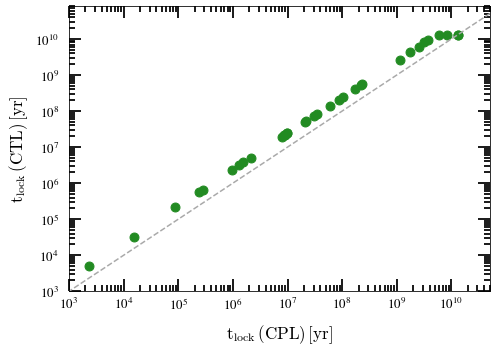

In [83]:
fig, ax = plt.subplots(figsize=(7,5))


ax.scatter(tlock_systems['tlock_CPL'], tlock_systems['tlock_CTL'], color='forestgreen', s=80);



ax.set_xlabel(r'$\mathrm{t_{lock} \, (CPL)} \, [\mathrm{yr}]$',fontsize = 17, labelpad=10)
ax.tick_params(axis='x', which='major', pad=5)
ax.set_ylabel(r'$\mathrm{t_{lock} \, (CTL)} \, [\mathrm{yr}]$',fontsize = 17, labelpad=5);
ax.tick_params(axis='y', which='major', pad=10)

for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(13);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(13); 
            
            
ax.tick_params(which='both', width=1.75);
ax.tick_params(which='major', length=12);
ax.tick_params(which='minor', length=6);

ax.set_xscale('log');
ax.set_yscale('log');

ax.set_xlim(10.E2, 5.E10);
ax.set_ylim(10.E2, 8.E10);


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')


ax.plot((1.E2, 1.E11), (1.E2, 1.E11), color='darkgrey', lw=1.5, ls='dashed');






fig.tight_layout()
fig.savefig('tlock_CPLCTL.pdf', bbox_to_inches = 'tight')

## Limit for taumig using at, acrit

In [84]:
taumig_at = 2.5E11 * (k2_Earth / k2_r_sample) * (Q_r_sample / Q_Earth) \
* (MMoon / MMoon)**(-1.0) * (planet_R)**(-5.0) * (at)**(8.0) # yr

taumig_acrit = 2.5E11 * (k2_Earth / k2_r_sample) * (Q_r_sample / Q_Earth) \
* (MMoon / MMoon)**(-1.0) * (planet_R)**(-5.0) * (acrit)**(8.0) # yr

In [85]:
for i, el in enumerate(taumig_at[wh_habitable]):
    
    if el >= 1.E4:
        
        print planet_name[wh_habitable][i] + ' ' +  planet_char[wh_habitable][i],
        "%.2e"%el, "%.2e"%taumig_acrit[wh_habitable][i]

CD-23 1056 b BD-06 1339 c Ross 1003 b IL Aqr b IL Aqr c


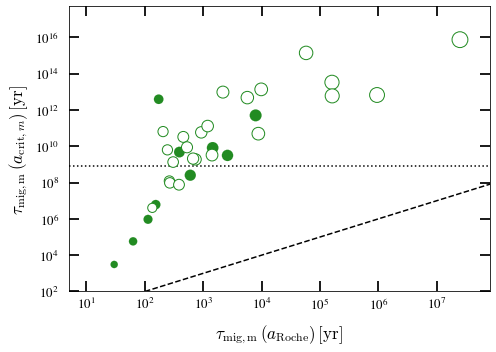

In [86]:
fig, ax = plt.subplots(figsize=(7,5))


ax.scatter(taumig_at[wh_habitable_PT], taumig_acrit[wh_habitable_PT],
           s = scale_factor*np.log10(planet_M[wh_habitable_PT]*corrfac),
           facecolor='forestgreen', edgecolor='forestgreen', zorder=z_points, marker='o', lw=0.1);


ax.scatter(taumig_at[wh_habitable_RV], taumig_acrit[wh_habitable_RV],
           s = scale_factor*np.log10(planet_M[wh_habitable_RV]*corrfac),
           facecolor='w', edgecolor='forestgreen', zorder=z_points, marker='o', lw=1.0);



ax.set_xlabel(r'$\mathrm{\tau_{\mathrm{mig},m}} \, (a_{\mathrm{Roche}}) \, [\mathrm{yr}]$',
              fontsize = 17, labelpad=10)
ax.tick_params(axis='x', which='major', pad=5)

ax.set_ylabel(r'$\mathrm{\tau_{\mathrm{mig},m}} \, (a_{\mathrm{crit},m}) \, [\mathrm{yr}]$',
              fontsize = 17, labelpad=5);
ax.tick_params(axis='y', which='major', pad=10)


for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(13);
for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(13); 
    
            
            
ax.tick_params(which='both', width=1.75);
ax.tick_params(which='major', length=10);
ax.tick_params(which='minor', length=6);

ax.set_xscale('log');
ax.set_yscale('log');



# Minor log ticks disappear for broad range
# https://stackoverflow.com/questions/45905135/matplotlib-missing-minor-ticks-on-y-axis-because-of-log-range-10-decades
#locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
#ax.yaxis.set_major_locator(locmaj)

#locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
#                                      numticks=20)
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.minorticks_off()



ax.set_xlim(5.E0, 8.E7);
ax.set_ylim(1.E2, 5.E17);

ax.plot((1.E2, 1.E8), (1.E2, 1.E8), color='black', ls='dashed', lw=1.5, zorder=z_lines)
ax.axhline(0.8E9, color='black', lw=1.5, ls='dotted', zorder=z_lines)


ax.get_yaxis().set_tick_params(right = True, which='both', direction='in')
ax.get_xaxis().set_tick_params(top = True, which='both', direction='in')



fig.tight_layout()
fig.savefig('taumig_acritaRoche.pdf', bbox_to_inches = 'tight')